# Homework 2 - Group 25

We import the libraries we need.

In [1]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from collections import defaultdict
from matplotlib.patches import *
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

We first of all load all the data we need and we also readjust it to our purposes.

## Teams tables

We start by loading the table of all teams.

In [2]:
All_Teams = pd.read_json(r"teams.json")

We always visualise tables to be sure everything is going ok. We only visualize head to make everything more compact.

In [3]:
All_Teams.head()

,city,name,wyId,officialName,area,type
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
3,Vitoria-Gasteiz,Deportivo Alav\u00e9s,696,Deportivo Alav\u00e9s,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
4,Valencia,Levante,695,Levante UD,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club


It'll be usefull to have individual teams tables for every league. To do so we start by adding a *nation* column to the table (which we extract from the *area* attribute).

In [4]:
All_Teams['nation'] = All_Teams.apply(lambda x : x['area']['name'], axis = 1)

In [5]:
All_Teams.head()

,city,name,wyId,officialName,area,type,nation
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,England
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club,Spain
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club,Spain
3,Vitoria-Gasteiz,Deportivo Alav\u00e9s,696,Deportivo Alav\u00e9s,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club,Spain
4,Valencia,Levante,695,Levante UD,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club,Spain


We drop all the attributes we don't need to save space and make everything more legible.

In [6]:
All_Teams = All_Teams.drop(['city', 'officialName', 'area'], axis = 1)

In [7]:
All_Teams.head()

,name,wyId,type,nation
0,Newcastle United,1613,club,England
1,Celta de Vigo,692,club,Spain
2,Espanyol,691,club,Spain
3,Deportivo Alav\u00e9s,696,club,Spain
4,Levante,695,club,Spain


We now drop national teams, since we are not interested in these ones. We also then drop the *type* column.

In [8]:
All_Teams = All_Teams[All_Teams['type'] == 'club'].drop(['type'], axis = 1)

In [9]:
All_Teams.head()

,name,wyId,nation
0,Newcastle United,1613,England
1,Celta de Vigo,692,Spain
2,Espanyol,691,Spain
3,Deportivo Alav\u00e9s,696,Spain
4,Levante,695,Spain


We now store different teams tables associated to different leagues.

In [10]:
La_Liga_Teams = All_Teams[All_Teams['nation'] == 'Spain']
Serie_A_Teams = All_Teams[All_Teams['nation'] == 'Italy']
Ligue_1_Teams = All_Teams[All_Teams['nation'] == 'France']
Bundesliga_Teams = All_Teams[All_Teams['nation'] == 'Germany']
Premier_League_Teams = All_Teams[All_Teams['nation'] == 'England']

In [11]:
Premier_League_Teams

,name,wyId,nation
0,Newcastle United,1613,England
8,Huddersfield Town,1673,England
26,AFC Bournemouth,1659,England
27,Brighton & Hove Albion,1651,England
39,Burnley,1646,England
54,Leicester City,1631,England
55,West Ham United,1633,England
56,Stoke City,1639,England
60,Watford,1644,England
65,Everton,1623,England


In [12]:
La_Liga_Teams

,name,wyId,nation
1,Celta de Vigo,692,Spain
2,Espanyol,691,Spain
3,Deportivo Alav\u00e9s,696,Spain
4,Levante,695,Spain
6,Getafe,698,Spain
9,Athletic Club,678,Spain
10,Atl\u00e9tico Madrid,679,Spain
13,Valencia,674,Spain
14,Real Madrid,675,Spain
15,Barcelona,676,Spain


In [13]:
Serie_A_Teams

,name,wyId,nation
18,SPAL,3204,Italy
34,Milan,3157,Italy
36,Juventus,3159,Italy
37,Roma,3158,Italy
38,Sassuolo,3315,Italy
47,Bologna,3166,Italy
49,Sampdoria,3164,Italy
50,Chievo,3165,Italy
51,Lazio,3162,Italy
52,Udinese,3163,Italy


In [14]:
Bundesliga_Teams

,name,wyId,nation
7,Borussia M'gladbach,2454,Germany
28,Werder Bremen,2443,Germany
29,Bayer Leverkusen,2446,Germany
30,Borussia Dortmund,2447,Germany
31,Bayern M\u00fcnchen,2444,Germany
32,Stuttgart,2445,Germany
33,Schalke 04,2449,Germany
41,Hannover 96,2455,Germany
43,Hertha BSC,2457,Germany
44,Wolfsburg,2451,Germany


In [15]:
Ligue_1_Teams

,name,wyId,nation
5,Troyes,3795,France
11,Olympique Lyonnais,3766,France
12,PSG,3767,France
20,Olympique Marseille,3771,France
21,Nantes,3770,France
22,Nice,3775,France
23,Rennes,3774,France
24,Strasbourg,3779,France
35,Angers,3799,France
40,Bordeaux,3772,France


We drop Angers from Ligue 1 table since data about this team are missing and create problems.

In [16]:
Ligue_1_Teams = Ligue_1_Teams.drop([35])

In [17]:
Ligue_1_Teams

,name,wyId,nation
5,Troyes,3795,France
11,Olympique Lyonnais,3766,France
12,PSG,3767,France
20,Olympique Marseille,3771,France
21,Nantes,3770,France
22,Nice,3775,France
23,Rennes,3774,France
24,Strasbourg,3779,France
40,Bordeaux,3772,France
42,Dijon,3804,France


This is all for now about teams tables, we'll of course come back to it later in reasearch questions.

## Player tables

We start by loading the table of all players.

In [18]:
All_Players = pd.read_json(r"players.json")

In [19]:
All_Players.head()

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",78,Harun,,Tekin,4502,1989-06-17,187,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Turkey', 'id': '792', 'alpha3code': ...",32777,right,H. Tekin,4687
1,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",73,Malang,,Sarr,3775,1999-01-23,182,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393228,left,M. Sarr,4423
2,"{'name': 'France', 'id': '250', 'alpha3code': ...",72,Over,,Mandanda,3772,1998-10-26,176,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'France', 'id': '250', 'alpha3code': ...",393230,,O. Mandanda,null
3,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",82,Alfred John Momar,,N'Diaye,683,1990-03-06,187,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'France', 'id': '250', 'alpha3code': ...",32793,right,A. N'Diaye,19314
4,"{'name': 'France', 'id': '250', 'alpha3code': ...",84,Ibrahima,,Konat\u00e9,2975,1999-05-25,192,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393247,right,I. Konat\u00e9,null


We drop all the columns we don't need.

In [20]:
All_Players = All_Players.drop(['passportArea', 'weight', 'currentTeamId', 'birthDate', 'role', 'birthArea', 'foot', 'currentNationalTeamId'], axis = 1)

In [21]:
All_Players.head()

,firstName,middleName,lastName,height,wyId,shortName
0,Harun,,Tekin,187,32777,H. Tekin
1,Malang,,Sarr,182,393228,M. Sarr
2,Over,,Mandanda,176,393230,O. Mandanda
3,Alfred John Momar,,N'Diaye,187,32793,A. N'Diaye
4,Ibrahima,,Konat\u00e9,192,393247,I. Konat\u00e9


That's all for now about players tables.

## Coaches tables

We start by loading the table of all coaches.

In [22]:
All_Coaches = pd.read_json(r'coaches.json')

In [23]:
All_Coaches.head()

,wyId,shortName,firstName,middleName,lastName,birthDate,birthArea,passportArea,currentTeamId
0,275580,Cesar Domingo,César Domingo,,Mendiondo López,None,"{'id': 76, 'alpha2code': 'BR', 'alpha3code': '...","{'id': 76, 'alpha2code': 'BR', 'alpha3code': '...",0
1,14710,J. Heynckes,Josef,,Heynckes,1945-05-09,"{'id': 276, 'alpha2code': 'DE', 'alpha3code': ...","{'id': 276, 'alpha2code': 'DE', 'alpha3code': ...",0
2,135480,G. De Biasi,Giovanni,,De Biasi,1956-06-16,"{'id': 380, 'alpha2code': 'IT', 'alpha3code': ...","{'id': 380, 'alpha2code': 'IT', 'alpha3code': ...",0
3,210074,Marcelino,Marcelino,,García Toral,1965-08-14,"{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...","{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...",674
4,293398,T. Korkut,Tayfun,,Korkut,1974-04-02,"{'id': 276, 'alpha2code': 'DE', 'alpha3code': ...","{'id': 792, 'alpha2code': 'TR', 'alpha3code': ...",0


We drop all the columns we don't need.

In [24]:
All_Coaches = All_Coaches.drop(['birthArea', 'passportArea', 'currentTeamId'], axis = 1)

In [25]:
All_Coaches.head()

,wyId,shortName,firstName,middleName,lastName,birthDate
0,275580,Cesar Domingo,César Domingo,,Mendiondo López,None
1,14710,J. Heynckes,Josef,,Heynckes,1945-05-09
2,135480,G. De Biasi,Giovanni,,De Biasi,1956-06-16
3,210074,Marcelino,Marcelino,,García Toral,1965-08-14
4,293398,T. Korkut,Tayfun,,Korkut,1974-04-02


We now want to parse the *birthDate* attribute into something that's easier to manage. We are going to compute how many days old was every coach at the start of the 2018 Premier League Season (2018-08-11).

We start by defining some useful functions which we're going to use to parse the information we want.

In [26]:
# Given a "YYYY-MM-DD" string the function returns a [YYYY, MM, DD] list
def get_birth_date(string_format):
    return(list(map(int, string_format.split("-"))))

# Given a [YYYY, MM, DD] list the function returns how many days old was the coach at the start of the Premier League Season
def get_days_old(birth_date):
    birth = dt.datetime(birth_date[0], birth_date[1], birth_date[2])
    premier_league_start = dt.datetime(2018, 8, 11)
    return((premier_league_start - birth).days)

# Given a "YYYY-MM-DD" string the function returns how many days old was the coach at the start of the Premier League Season
# The function returns -1 if the string is None
def get_coach_days_old(string_format):
    if(string_format is None):
        return(-1)
    return(get_days_old(get_birth_date(string_format)))

We now use these functions to add to the coach table the *daysOld* column we want. We also don't need the *birthDate* column anymore.

In [27]:
All_Coaches['daysOld'] = All_Coaches.apply(lambda x : get_coach_days_old(x['birthDate']), axis = 1)
All_Coaches = All_Coaches.drop(['birthDate'], axis = 1)

In [28]:
All_Coaches.head()

,wyId,shortName,firstName,middleName,lastName,daysOld
0,275580,Cesar Domingo,César Domingo,,Mendiondo López,-1
1,14710,J. Heynckes,Josef,,Heynckes,26757
2,135480,G. De Biasi,Giovanni,,De Biasi,22701
3,210074,Marcelino,Marcelino,,García Toral,19355
4,293398,T. Korkut,Tayfun,,Korkut,16202


In the end we add an *ageInterval* column which gives the 5-years age interval of the coach. We are going to use this later to see distributions.

We start with a simple function.

In [29]:
# Given how many days old a coach is the functions returns his 5-years interval
def get_interval_age(days_old):
    if(days_old == -1):
        return(None)
    years_old = days_old // 365
    minimum = (years_old // 5) * 5
    return((minimum, minimum + 5))

We use this function to get the column we want.

In [30]:
All_Coaches['ageInterval'] = All_Coaches.apply(lambda x : get_interval_age(x['daysOld']), axis = 1)

In [31]:
All_Coaches.head()

,wyId,shortName,firstName,middleName,lastName,daysOld,ageInterval
0,275580,Cesar Domingo,César Domingo,,Mendiondo López,-1,None
1,14710,J. Heynckes,Josef,,Heynckes,26757,"(70, 75)"
2,135480,G. De Biasi,Giovanni,,De Biasi,22701,"(60, 65)"
3,210074,Marcelino,Marcelino,,García Toral,19355,"(50, 55)"
4,293398,T. Korkut,Tayfun,,Korkut,16202,"(40, 45)"


We are done with coaches tables for now.

## Matches tables

We start by loading matches tables.

In [32]:
La_Liga_Matches = pd.read_json(r'matches_Spain.json')
Serie_A_Matches = pd.read_json(r'matches_Italy.json')
Bundesliga_Matches = pd.read_json(r'matches_Germany.json')
Premier_League_Matches = pd.read_json(r'matches_England.json')
Ligue_1_Matches = pd.read_json(r'matches_France.json')

In [33]:
Premier_League_Matches.head()

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,referees,duration,competitionId
0,Played,4405654,38,"{'1646': {'scoreET': 0, 'coachId': 8880, 'side...",181150,2018-05-13 14:00:00,1659,Turf Moor,2500089,"Burnley - AFC Bournemouth, 1 - 2","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 385705, 'role': 'referee'}, {'r...",Regular,364
1,Played,4405654,38,"{'1628': {'scoreET': 0, 'coachId': 8357, 'side...",181150,2018-05-13 14:00:00,1628,Selhurst Park,2500090,"Crystal Palace - West Bromwich Albion, 2 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 381851, 'role': 'referee'}, {'r...",Regular,364
2,Played,4405654,38,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",181150,2018-05-13 14:00:00,1609,The John Smith's Stadium,2500091,"Huddersfield Town - Arsenal, 0 - 1","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 384965, 'role': 'referee'}, {'r...",Regular,364
3,Played,4405654,38,"{'1651': {'scoreET': 0, 'coachId': 8093, 'side...",181150,2018-05-13 14:00:00,1612,Anfield,2500092,"Liverpool - Brighton & Hove Albion, 4 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 385704, 'role': 'referee'}, {'r...",Regular,364
4,Played,4405654,38,"{'1644': {'scoreET': 0, 'coachId': 93112, 'sid...",181150,2018-05-13 14:00:00,1611,Old Trafford,2500093,"Manchester United - Watford, 1 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 381853, 'role': 'referee'}, {'r...",Regular,364


In [34]:
La_Liga_Matches.head()

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,referees,duration,competitionId
0,Played,4406122,38,"{'676': {'scoreET': 0, 'coachId': 92894, 'side...",181144,2018-05-20 18:45:00,676,Camp Nou,2565922,"Barcelona - Real Sociedad, 1 - 0","May 20, 2018 at 8:45:00 PM GMT+2","[{'refereeId': 398931, 'role': 'referee'}, {'r...",Regular,795
1,Played,4406122,38,"{'679': {'scoreET': 0, 'coachId': 3427, 'side'...",181144,2018-05-20 16:30:00,0,Estadio Wanda Metropolitano,2565925,"Atl\u00e9tico Madrid - Eibar, 2 - 2","May 20, 2018 at 6:30:00 PM GMT+2","[{'refereeId': 395056, 'role': 'referee'}, {'r...",Regular,795
2,Played,4406122,38,"{'691': {'scoreET': 0, 'coachId': 444778, 'sid...",181144,2018-05-20 14:15:00,691,San Mam\u00e9s Barria,2565919,"Athletic Club - Espanyol, 0 - 1","May 20, 2018 at 4:15:00 PM GMT+2","[{'refereeId': 384957, 'role': 'referee'}, {'r...",Regular,795
3,Played,4406122,38,"{'674': {'scoreET': 0, 'coachId': 210074, 'sid...",181144,2018-05-20 10:00:00,674,Estadio de Mestalla,2565924,"Valencia - Deportivo La Coru\u00f1a, 2 - 1","May 20, 2018 at 12:00:00 PM GMT+2","[{'refereeId': 398913, 'role': 'referee'}, {'r...",Regular,795
4,Played,4406122,38,"{'675': {'scoreET': 0, 'coachId': 275283, 'sid...",181144,2018-05-19 18:45:00,0,Estadio de la Cer\u00e1mica,2565927,"Villarreal - Real Madrid, 2 - 2","May 19, 2018 at 8:45:00 PM GMT+2","[{'refereeId': 395085, 'role': 'referee'}, {'r...",Regular,795


In [35]:
Serie_A_Matches.head()

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,referees,duration,competitionId
0,Played,4406278,38,"{'3162': {'scoreET': 0, 'coachId': 251025, 'si...",181248,2018-05-20 18:45:00,3161,,2576335,"Lazio - Internazionale, 2 - 3","May 20, 2018 at 8:45:00 PM GMT+2","[{'refereeId': 377206, 'role': 'referee'}, {'r...",Regular,524
1,Played,4406278,38,"{'3158': {'scoreET': 0, 'coachId': 210119, 'si...",181248,2018-05-20 18:45:00,3158,MAPEI Stadium - Citt\u00e0 del Tricolore,2576336,"Sassuolo - Roma, 0 - 1","May 20, 2018 at 8:45:00 PM GMT+2","[{'refereeId': 377255, 'role': 'referee'}, {'r...",Regular,524
2,Played,4406278,38,"{'3173': {'scoreET': 0, 'coachId': 251044, 'si...",181248,2018-05-20 16:00:00,3173,,2576329,"Cagliari - Atalanta, 1 - 0","May 20, 2018 at 6:00:00 PM GMT+2","[{'refereeId': 377247, 'role': 'referee'}, {'r...",Regular,524
3,Played,4406278,38,"{'3165': {'scoreET': 0, 'coachId': 272970, 'si...",181248,2018-05-20 16:00:00,3165,,2576330,"Chievo - Benevento, 1 - 0","May 20, 2018 at 6:00:00 PM GMT+2","[{'refereeId': 377246, 'role': 'referee'}, {'r...",Regular,524
4,Played,4406278,38,"{'3166': {'scoreET': 0, 'coachId': 20481, 'sid...",181248,2018-05-20 16:00:00,3163,,2576331,"Udinese - Bologna, 1 - 0","May 20, 2018 at 6:00:00 PM GMT+2","[{'refereeId': 377254, 'role': 'referee'}, {'r...",Regular,524


In [36]:
Bundesliga_Matches.head()

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,referees,duration,competitionId
0,Played,4405517,34,"{'2444': {'scoreET': 0, 'coachId': 14710, 'sid...",181137,2018-05-12 13:30:00,2445,Allianz Arena,2517036,"Bayern M\u00fcnchen - Stuttgart, 1 - 4","May 12, 2018 at 3:30:00 PM GMT+2","[{'refereeId': 379444, 'role': 'referee'}, {'r...",Regular,426
1,Played,4405517,34,"{'2482': {'scoreET': 0, 'coachId': 272299, 'si...",181137,2018-05-12 13:30:00,2482,WIRSOL Rhein-Neckar-Arena,2517037,"Hoffenheim - Borussia Dortmund, 3 - 1","May 12, 2018 at 3:30:00 PM GMT+2","[{'refereeId': 384936, 'role': 'referee'}, {'r...",Regular,426
2,Played,4405517,34,"{'2457': {'scoreET': 0, 'coachId': 18987, 'sid...",181137,2018-05-12 13:30:00,2975,Olympiastadion Berlin,2517038,"Hertha BSC - RB Leipzig, 2 - 6","May 12, 2018 at 3:30:00 PM GMT+2","[{'refereeId': 387276, 'role': 'referee'}, {'r...",Regular,426
3,Played,4405517,34,"{'2453': {'scoreET': 0, 'coachId': 14977, 'sid...",181137,2018-05-12 13:30:00,2453,Schwarzwald-Stadion,2517039,"Freiburg - Augsburg, 2 - 0","May 12, 2018 at 3:30:00 PM GMT+2","[{'refereeId': 378957, 'role': 'referee'}, {'r...",Regular,426
4,Played,4405517,34,"{'2449': {'scoreET': 0, 'coachId': 447924, 'si...",181137,2018-05-12 13:30:00,2449,VELTINS-Arena,2517040,"Schalke 04 - Eintracht Frankfurt, 1 - 0","May 12, 2018 at 3:30:00 PM GMT+2","[{'refereeId': 387273, 'role': 'referee'}, {'r...",Regular,426


In [37]:
Ligue_1_Matches.head()

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,referees,duration,competitionId
0,Played,4405655,38,"{'3783': {'scoreET': 0, 'coachId': 210513, 'si...",181189,2018-05-19 19:00:00,0,Stade Michel d'Ornano,2501056,"Caen - PSG, 0 - 0","May 19, 2018 at 9:00:00 PM GMT+2","[{'refereeId': 384954, 'role': 'referee'}, {'r...",Regular,412
1,Played,4405655,38,"{'3804': {'scoreET': 0, 'coachId': 220743, 'si...",181189,2018-05-19 19:00:00,0,Stade Gaston-G\u00e9rard,2501057,"Dijon - Angers SCO, 2 - 1","May 19, 2018 at 9:00:00 PM GMT+2","[{'refereeId': 385496, 'role': 'referee'}, {'r...",Regular,412
2,Played,4405655,38,"{'3766': {'scoreET': 0, 'coachId': 211238, 'si...",181189,2018-05-19 19:00:00,3766,Groupama Stadium,2501058,"Olympique Lyonnais - Nice, 3 - 2","May 19, 2018 at 9:00:00 PM GMT+2","[{'refereeId': 386297, 'role': 'referee'}, {'r...",Regular,412
3,Played,4405655,38,"{'3771': {'scoreET': 0, 'coachId': 25691, 'sid...",181189,2018-05-19 19:00:00,3771,Stade V\u00e9lodrome,2501059,"Olympique Marseille - Amiens SC, 2 - 1","May 19, 2018 at 9:00:00 PM GMT+2","[{'refereeId': 385529, 'role': 'referee'}, {'r...",Regular,412
4,Played,4405655,38,"{'3772': {'scoreET': 0, 'coachId': 9092, 'side...",181189,2018-05-19 19:00:00,3772,Stade Saint-Symphorien,2501060,"Metz - Bordeaux, 0 - 4","May 19, 2018 at 9:00:00 PM GMT+2","[{'refereeId': 385796, 'role': 'referee'}, {'r...",Regular,412


We drop all the columns we don't need.

In [38]:
La_Liga_Matches = La_Liga_Matches.drop(['status', 'roundId', 'seasonId', 'dateutc', 'venue', 'date', 'referees', 'duration', 'competitionId'], axis = 1)
Serie_A_Matches = Serie_A_Matches.drop(['status', 'roundId', 'seasonId', 'dateutc', 'venue', 'date', 'referees', 'duration', 'competitionId'], axis = 1)
Ligue_1_Matches = Ligue_1_Matches.drop(['status', 'roundId', 'seasonId', 'dateutc', 'venue', 'date', 'referees', 'duration', 'competitionId'], axis = 1)
Bundesliga_Matches = Bundesliga_Matches.drop(['status', 'roundId', 'seasonId', 'dateutc', 'venue', 'date', 'referees', 'duration', 'competitionId'], axis = 1)
Premier_League_Matches = Premier_League_Matches.drop(['status', 'roundId', 'seasonId', 'dateutc', 'venue', 'date', 'referees', 'duration', 'competitionId'], axis = 1)

In [39]:
Premier_League_Matches.head()

,gameweek,teamsData,winner,wyId,label
0,38,"{'1646': {'scoreET': 0, 'coachId': 8880, 'side...",1659,2500089,"Burnley - AFC Bournemouth, 1 - 2"
1,38,"{'1628': {'scoreET': 0, 'coachId': 8357, 'side...",1628,2500090,"Crystal Palace - West Bromwich Albion, 2 - 0"
2,38,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",1609,2500091,"Huddersfield Town - Arsenal, 0 - 1"
3,38,"{'1651': {'scoreET': 0, 'coachId': 8093, 'side...",1612,2500092,"Liverpool - Brighton & Hove Albion, 4 - 0"
4,38,"{'1644': {'scoreET': 0, 'coachId': 93112, 'sid...",1611,2500093,"Manchester United - Watford, 1 - 0"


Again we are done for now with matches tables.

## Events table

We load our data.

In [40]:
events_England = pd.read_json(r'events_England.json')
events_Germany = pd.read_json(r'events_Germany.json')
events_Spain = pd.read_json(r'events_Spain.json')
events_Italy = pd.read_json(r'events_Italy.json')
events_France = pd.read_json(r'events_France.json')

In [41]:
events_England.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",2499719,Pass,1609,1H,2.758649,85,177959171
1,8,High pass,[{'id': 1801}],370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",2499719,Pass,1609,1H,4.946850,83,177959172
2,8,Head pass,[{'id': 1801}],3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",2499719,Pass,1609,1H,6.542188,82,177959173
3,8,Head pass,[{'id': 1801}],120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",2499719,Pass,1609,1H,8.143395,82,177959174
4,8,Simple pass,[{'id': 1801}],167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",2499719,Pass,1609,1H,10.302366,85,177959175


We drop columns we don't need.

In [42]:
events_England = events_England.drop(['id'], axis = 1)
events_Spain = events_Spain.drop(['id'], axis = 1)
events_Italy = events_Italy.drop(['id'], axis = 1)
events_France = events_France.drop(['id'], axis = 1)
events_Germany = events_Germany.drop(['id'], axis = 1)

We are done for now.

## RQ1

We start by defining functions which we'll use to accomplish our goals.

In [43]:
# Given the label attribute of a match the functions returns the names of the teams playing that match
def get_teams(label):
    return(label.split(',')[0].split(' - '))

In [44]:
# Given the label string of a match we want to find the winner team, return 'DRAW' if draw
def get_winner(label):
    teams = get_teams(label)
    score = list(map(int, label.split(',')[1].split(' - ')))
    if(score[0] > score[1]):
        return(teams[0])
    elif(score[1] > score[0]):
        return(teams[1])
    return('DRAW')

In [45]:
# Given a team name we want to extract only the matches played by that team
def get_matches_per_team(team_name, matches):
    return(matches[matches.apply(lambda x : team_name in get_teams(x['label']), axis = 1)])

We try this last function to be sure everything is right.

In [46]:
get_matches_per_team('Liverpool', Premier_League_Matches).head()

,gameweek,teamsData,winner,wyId,label
3,38,"{'1651': {'scoreET': 0, 'coachId': 8093, 'side...",1612,2500092,"Liverpool - Brighton & Hove Albion, 4 - 0"
17,37,"{'1612': {'scoreET': 0, 'coachId': 14791, 'sid...",1610,2500082,"Chelsea - Liverpool, 1 - 0"
35,36,"{'1639': {'scoreET': 0, 'coachId': 0, 'side': ...",0,2500072,"Liverpool - Stoke City, 0 - 0"
41,35,"{'1627': {'scoreET': 0, 'coachId': 0, 'side': ...",0,2500068,"West Bromwich Albion - Liverpool, 2 - 2"
50,34,"{'1659': {'scoreET': 0, 'coachId': 8934, 'side...",1612,2500052,"Liverpool - AFC Bournemouth, 3 - 0"


In [47]:
# Given a team we want to get a series telling us wins, loses and draws
def get_wins_team(team_name, matches):
    lista = list(reversed(get_matches_per_team(team_name, matches).apply(lambda x : get_winner(x['label']), axis = 1).tolist()))
    return(lista)

In [48]:
# Given a team we get a list of cronological scores of that team
def get_scores(team_name, matches):
    series = get_wins_team(team_name, matches)
    current = 0
    lista = []
    for game in series:
        if(game == team_name):
            current += 3
        elif(game == 'DRAW'):
            current += 1
        lista.append(current)
    return(lista)

Again we try the functions.

In [49]:
print(get_scores('Liverpool', Premier_League_Matches))

[1, 4, 7, 7, 8, 11, 12, 13, 13, 16, 19, 22, 23, 26, 29, 30, 31, 34, 35, 38, 41, 44, 47, 47, 50, 51, 54, 57, 60, 60, 63, 66, 67, 70, 71, 72, 72, 75]


We finally define functions to get longest win and lose streaks of a team

In [50]:
# Given a team and his list of wins we get the longest win streak
def get_longest_streak(team_name, matches):
    max = 0
    current = 0
    for element in get_wins_team(team_name, matches):
        if(element == team_name):
            current += 1
            if(current > max):
                max = current
        else:
            current = 0
    return(max)

# Given a team and his list of wins we get the longest lose streak
def get_longest_lose_streak(team_name, matches):
    max = 0
    current = 0
    for element in get_wins_team(team_name, matches):
        if(element != team_name and element != 'DRAW'):
            current += 1
            if(current > max):
                max = current
        else:
            current = 0
    return(max)

In the end we attach to teams tables *longestWinStreak* and *longestLoseStreak* columns.

In [51]:
La_Liga_Teams['longestWinStreak'] = La_Liga_Teams.apply(lambda x : get_longest_streak(x['name'], La_Liga_Matches), axis = 1)
Premier_League_Teams['longestWinStreak'] = Premier_League_Teams.apply(lambda x : get_longest_streak(x['name'], Premier_League_Matches), axis = 1)
Serie_A_Teams['longestWinStreak'] = Serie_A_Teams.apply(lambda x : get_longest_streak(x['name'], Serie_A_Matches), axis = 1)
Bundesliga_Teams['longestWinStreak'] = Bundesliga_Teams.apply(lambda x : get_longest_streak(x['name'], Bundesliga_Matches), axis = 1)
Ligue_1_Teams['longestWinStreak'] = Ligue_1_Teams.apply(lambda x : get_longest_streak(x['name'], Ligue_1_Matches), axis = 1)

La_Liga_Teams['longestLoseStreak'] = La_Liga_Teams.apply(lambda x : get_longest_lose_streak(x['name'], La_Liga_Matches), axis = 1)
Premier_League_Teams['longestLoseStreak'] = Premier_League_Teams.apply(lambda x : get_longest_lose_streak(x['name'], Premier_League_Matches), axis = 1)
Serie_A_Teams['longestLoseStreak'] = Serie_A_Teams.apply(lambda x : get_longest_lose_streak(x['name'], Serie_A_Matches), axis = 1)
Bundesliga_Teams['longestLoseStreak'] = Bundesliga_Teams.apply(lambda x : get_longest_lose_streak(x['name'], Bundesliga_Matches), axis = 1)
Ligue_1_Teams['longestLoseStreak'] = Ligue_1_Teams.apply(lambda x : get_longest_lose_streak(x['name'], Ligue_1_Matches), axis = 1)

We visualse our datas to see results.

In [52]:
Premier_League_Teams

,name,wyId,nation,longestWinStreak,longestLoseStreak
0,Newcastle United,1613,England,4,4
8,Huddersfield Town,1673,England,2,5
26,AFC Bournemouth,1659,England,2,4
27,Brighton & Hove Albion,1651,England,2,3
39,Burnley,1646,England,5,3
54,Leicester City,1631,England,4,2
55,West Ham United,1633,England,1,3
56,Stoke City,1639,England,1,4
60,Watford,1644,England,2,4
65,Everton,1623,England,2,3


We now for every league print the two teams who got the longest win and lose streak.

In [53]:
print('Premier League')
print('Longest win streaks')
win_team = Premier_League_Teams.sort_values(by = ['longestWinStreak'], ascending = False).iloc[0:2]
print(win_team.iloc[0]['name'] + " - " + str(win_team.iloc[0]['longestWinStreak']))
print(win_team.iloc[1]['name'] + " - " + str(win_team.iloc[1]['longestWinStreak']))
print('Longest lose streaks')
win_team = Premier_League_Teams.sort_values(by = ['longestLoseStreak'], ascending = False).iloc[0:2]
print(win_team.iloc[0]['name'] + " - " + str(win_team.iloc[0]['longestLoseStreak']))
print(win_team.iloc[1]['name'] + " - " + str(win_team.iloc[1]['longestLoseStreak']))
print("")
print('Serie A')
print('Longest win streaks')
win_team = Serie_A_Teams.sort_values(by = ['longestWinStreak'], ascending = False).iloc[0:2]
print(win_team.iloc[0]['name'] + " - " + str(win_team.iloc[0]['longestWinStreak']))
print(win_team.iloc[1]['name'] + " - " + str(win_team.iloc[1]['longestWinStreak']))
print('Longest lose streaks')
win_team = Serie_A_Teams.sort_values(by = ['longestLoseStreak'], ascending = False).iloc[0:2]
print(win_team.iloc[0]['name'] + " - " + str(win_team.iloc[0]['longestLoseStreak']))
print(win_team.iloc[1]['name'] + " - " + str(win_team.iloc[1]['longestLoseStreak']))
print("")
print('La Liga')
print('Longest win streaks')
win_team = La_Liga_Teams.sort_values(by = ['longestWinStreak'], ascending = False).iloc[0:2]
print(win_team.iloc[0]['name'] + " - " + str(win_team.iloc[0]['longestWinStreak']))
print(win_team.iloc[1]['name'] + " - " + str(win_team.iloc[1]['longestWinStreak']))
print('Longest lose streaks')
win_team = La_Liga_Teams.sort_values(by = ['longestLoseStreak'], ascending = False).iloc[0:2]
print(win_team.iloc[0]['name'] + " - " + str(win_team.iloc[0]['longestLoseStreak']))
print(win_team.iloc[1]['name'] + " - " + str(win_team.iloc[1]['longestLoseStreak']))
print("")
print('Bundesliga')
print('Longest win streaks')
win_team = Bundesliga_Teams.sort_values(by = ['longestWinStreak'], ascending = False).iloc[0:2]
print(win_team.iloc[0]['name'] + " - " + str(win_team.iloc[0]['longestWinStreak']))
print(win_team.iloc[1]['name'] + " - " + str(win_team.iloc[1]['longestWinStreak']))
print('Longest lose streaks')
win_team = Bundesliga_Teams.sort_values(by = ['longestLoseStreak'], ascending = False).iloc[0:2]
print(win_team.iloc[0]['name'] + " - " + str(win_team.iloc[0]['longestLoseStreak']))
print(win_team.iloc[1]['name'] + " - " + str(win_team.iloc[1]['longestLoseStreak']))
print("")
print('Ligue 1')
print('Longest win streaks')
win_team = Ligue_1_Teams.sort_values(by = ['longestWinStreak'], ascending = False).iloc[0:2]
print(win_team.iloc[0]['name'] + " - " + str(win_team.iloc[0]['longestWinStreak']))
print(win_team.iloc[1]['name'] + " - " + str(win_team.iloc[1]['longestWinStreak']))
print('Longest lose streaks')
win_team = Ligue_1_Teams.sort_values(by = ['longestLoseStreak'], ascending = False).iloc[0:2]
print(win_team.iloc[0]['name'] + " - " + str(win_team.iloc[0]['longestLoseStreak']))
print(win_team.iloc[1]['name'] + " - " + str(win_team.iloc[1]['longestLoseStreak']))
print("")

Premier League
Longest win streaks
Manchester City - 18
Tottenham Hotspur - 6
Longest lose streaks
West Bromwich Albion - 8
Crystal Palace - 7

Serie A
Longest win streaks
Juventus - 12
Napoli - 10
Longest lose streaks
Benevento - 14
Udinese - 11

La Liga
Longest win streaks
Valencia - 8
Barcelona - 7
Longest lose streaks
Las Palmas - 8
M\u00e1laga - 7

Bundesliga
Longest win streaks
Bayern M\u00fcnchen - 10
Schalke 04 - 6
Longest lose streaks
K\u00f6ln - 5
Freiburg - 5

Ligue 1
Longest win streaks
PSG - 9
Olympique Lyonnais - 8
Longest lose streaks
Metz - 6
Amiens SC - 5



For every league we now want to get a table of scores so that we can easily plot what we want.

In [54]:
Premier_League_Scores = pd.DataFrame([], columns = ['gameWeek', 'team', 'score'], dtype = int)

for _, team in Premier_League_Teams.iterrows():
    name = team['name']
    lista = get_scores(name, Premier_League_Matches)
    for index in range(len(lista)):
        Premier_League_Scores = Premier_League_Scores.append({'team' : name, 'gameWeek' : index + 1, 'score' : lista[index]}, ignore_index = True)
        
Serie_A_Scores = pd.DataFrame([], columns = ['gameWeek', 'team', 'score'], dtype = int)

for _, team in Serie_A_Teams.iterrows():
    name = team['name']
    lista = get_scores(name, Serie_A_Matches)
    for index in range(len(lista)):
        Serie_A_Scores = Serie_A_Scores.append({'team' : name, 'gameWeek' : index + 1, 'score' : lista[index]}, ignore_index = True)

Bundesliga_Scores = pd.DataFrame([], columns = ['gameWeek', 'team', 'score'], dtype = int)

for _, team in Bundesliga_Teams.iterrows():
    name = team['name']
    lista = get_scores(name, Bundesliga_Matches)
    for index in range(len(lista)):
        Bundesliga_Scores = Bundesliga_Scores.append({'team' : name, 'gameWeek' : index + 1, 'score' : lista[index]}, ignore_index = True)
        
La_Liga_Scores = pd.DataFrame([], columns = ['gameWeek', 'team', 'score'], dtype = int)

for _, team in La_Liga_Teams.iterrows():
    name = team['name']
    lista = get_scores(name, La_Liga_Matches)
    for index in range(len(lista)):
        La_Liga_Scores = La_Liga_Scores.append({'team' : name, 'gameWeek' : index + 1, 'score' : lista[index]}, ignore_index = True)
        
Ligue_1_Scores = pd.DataFrame([], columns = ['gameWeek', 'team', 'score'], dtype = int)

for _, team in Ligue_1_Teams.iterrows():
    name = team['name']
    lista = get_scores(name, Ligue_1_Matches)
    for index in range(len(lista)):
        Ligue_1_Scores = Ligue_1_Scores.append({'team' : name, 'gameWeek' : index + 1, 'score' : lista[index]}, ignore_index = True)

We plot scores for every team and league.

Premier League

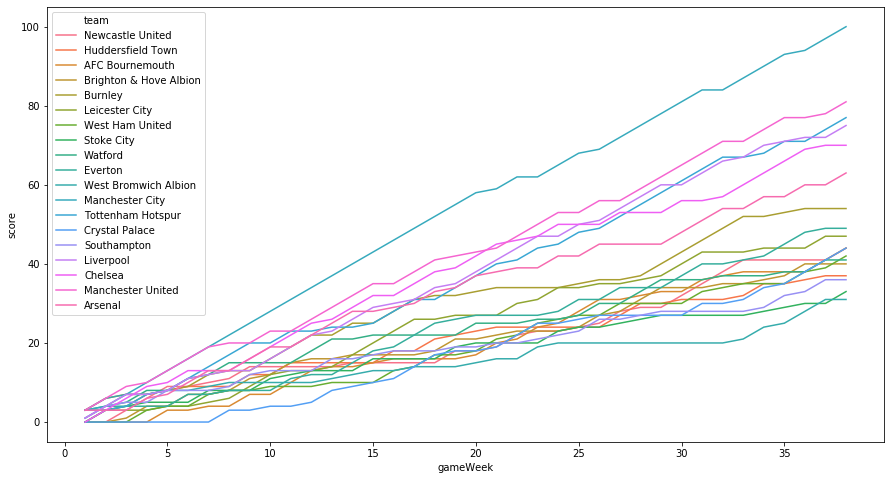

In [55]:
plt.figure(figsize = (15, 8))
sns.lineplot(x = 'gameWeek', y = 'score', hue = 'team', data = Premier_League_Scores)
plt.show()

Serie A

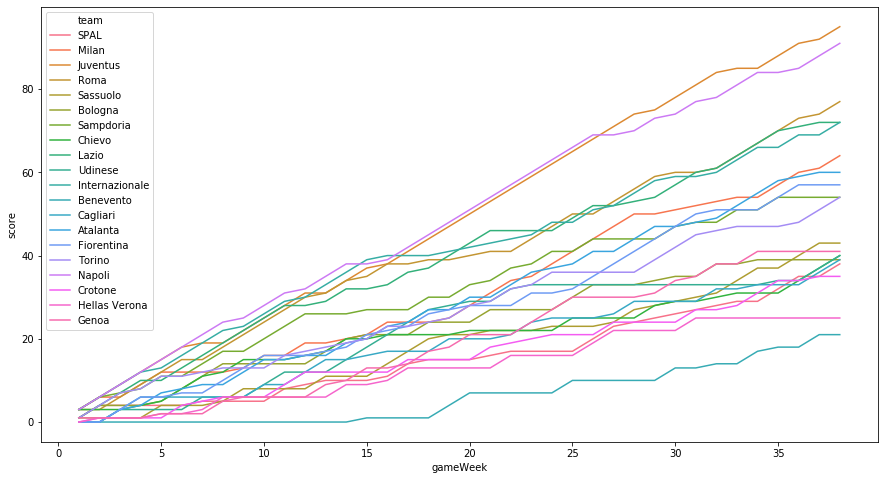

In [56]:
plt.figure(figsize = (15, 8))
sns.lineplot(x = 'gameWeek', y = 'score', hue = 'team', data = Serie_A_Scores)
plt.show()

La Liga

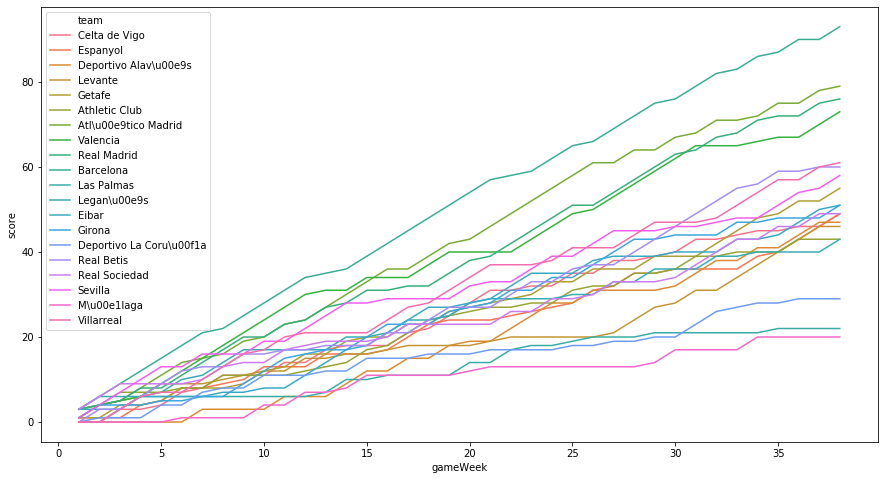

In [57]:
plt.figure(figsize = (15, 8))
sns.lineplot(x = 'gameWeek', y = 'score', hue = 'team', data = La_Liga_Scores)
plt.show()

Bundesliga

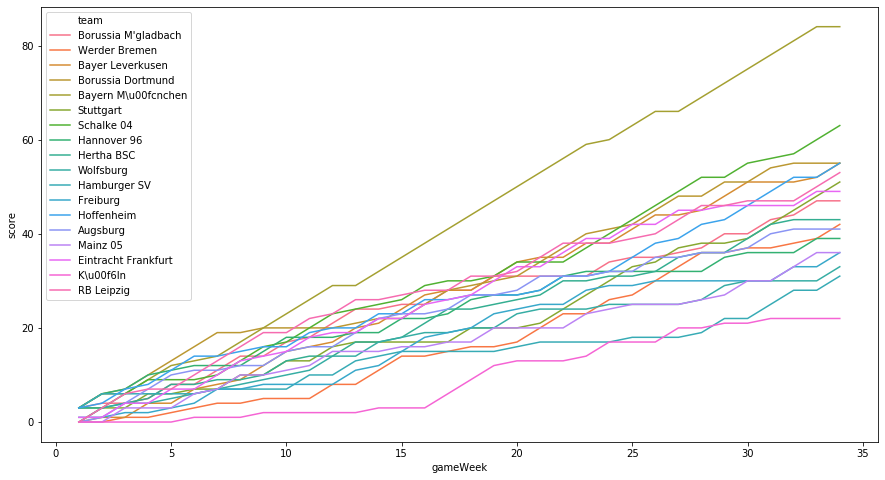

In [58]:
plt.figure(figsize = (15, 8))
sns.lineplot(x = 'gameWeek', y = 'score', hue = 'team', data = Bundesliga_Scores)
plt.show()

Ligue 1

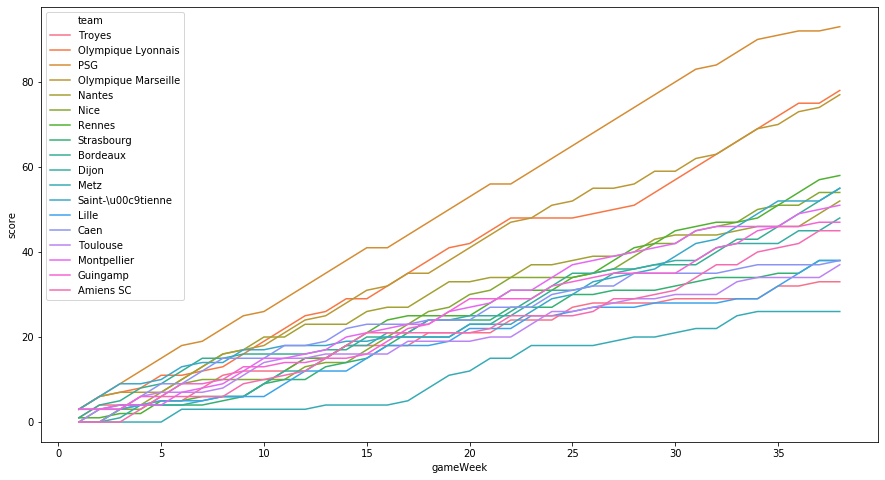

In [59]:
plt.figure(figsize = (15, 8))
sns.lineplot(x = 'gameWeek', y = 'score', hue = 'team', data = Ligue_1_Scores)
plt.show()

## RQ2

At first we choose five teams, trying to pick them both winning, losing and average teams.

In [60]:
#Premier League
Manchester_city = get_matches_per_team('Manchester City', Premier_League_Matches)
Tottenham_hotspur = get_matches_per_team('Tottenham Hotspur', Premier_League_Matches)
Arsenal = get_matches_per_team('Arsenal', Premier_League_Matches)
Everton = get_matches_per_team('Everton', Premier_League_Matches)
Liverpool = get_matches_per_team('Liverpool', Premier_League_Matches)
#a Liga
Valencia = get_matches_per_team('Valencia', La_Liga_Matches)
Barcelona = get_matches_per_team('Barcelona', La_Liga_Matches)
Levante = get_matches_per_team('Levante', La_Liga_Matches)
Eibar = get_matches_per_team('Eibar', La_Liga_Matches)
Real_Betis = get_matches_per_team('Real Betis', La_Liga_Matches)
#Serie A
Juventus = get_matches_per_team('Juventus', Serie_A_Matches)
Napoli = get_matches_per_team('Napoli', Serie_A_Matches)
Lazio = get_matches_per_team('Lazio', Serie_A_Matches)
Genoa = get_matches_per_team('Genoa', Serie_A_Matches)
Crotone = get_matches_per_team('Crotone', Serie_A_Matches)
# Ligua 1
PSG = get_matches_per_team('PSG', Ligue_1_Matches)
Olympique_Lyonnais = get_matches_per_team('Olympique Lyonnais', Ligue_1_Matches)
Bordeaux = get_matches_per_team('Bordeaux', Ligue_1_Matches)
Strasbourg = get_matches_per_team('Strasbourg', Ligue_1_Matches)
Caen = get_matches_per_team('Caen', Ligue_1_Matches)
# Bundes Liga
Schalke_04 	 = get_matches_per_team('Schalke 04', Bundesliga_Matches)
Stuttgart = get_matches_per_team('Stuttgart', Bundesliga_Matches)
Augsburg = get_matches_per_team('Augsburg', Bundesliga_Matches)
Freiburg = get_matches_per_team('Freiburg', Bundesliga_Matches)
Wolfsburg = get_matches_per_team('Wolfsburg', Bundesliga_Matches)

We do now some manipulations on the tables to accomplish our goals.

In [65]:
#Premier League
Manchester_city['winner'] = get_wins_team('Manchester City', Premier_League_Matches)
Tottenham_hotspur['winner'] = get_wins_team('Tottenham Hotspur', Premier_League_Matches)
Arsenal['winner'] = get_wins_team('Arsenal', Premier_League_Matches)
Everton['winner'] = get_wins_team('Everton', Premier_League_Matches)
Liverpool['winner'] = get_wins_team('Liverpool', Premier_League_Matches)
#La Liga
Valencia['winner'] = get_wins_team('Valencia', La_Liga_Matches)
Barcelona['winner'] = get_wins_team('Barcelona', La_Liga_Matches)
Levante['winner'] = get_wins_team('Levante', La_Liga_Matches)
Eibar['winner'] = get_wins_team('Eibar', La_Liga_Matches)
Real_Betis['winner'] = get_wins_team('Real Betis', La_Liga_Matches)
#Serie A
Juventus['winner'] = get_wins_team('Juventus', Serie_A_Matches)
Napoli['winner'] = get_wins_team('Napoli', Serie_A_Matches)
Lazio['winner'] = get_wins_team('Lazio', Serie_A_Matches)
Genoa['winner'] = get_wins_team('Genoa', Serie_A_Matches)
Crotone['winner'] = get_wins_team('Crotone', Serie_A_Matches)
# Bundes Liga
PSG['winner'] = get_wins_team('PSG', Ligue_1_Matches)
Olympique_Lyonnais['winner'] = get_wins_team('Olympique Lyonnais', Ligue_1_Matches)
Bordeaux['winner'] = get_wins_team('Bordeaux', Ligue_1_Matches)
Strasbourg['winner'] = get_wins_team('Strasbourg', Ligue_1_Matches)
Caen['winner'] = get_wins_team('Caen', Ligue_1_Matches)
# Bundes Liga
Schalke_04['winner'] = get_wins_team('Schalke 04', Bundesliga_Matches)
Stuttgart['winner'] = get_wins_team('Stuttgart', Bundesliga_Matches)
Augsburg['winner'] = get_wins_team('Augsburg', Bundesliga_Matches)
Freiburg['winner'] = get_wins_team('Freiburg', Bundesliga_Matches)
Wolfsburg['winner'] = get_wins_team('Wolfsburg', Bundesliga_Matches)

In [66]:
def get_result_arsenal (x):
    if x == 'Arsenal': return 'win'
    elif x == 'DRAW': return 'draw'
    else: return 'lose'
Arsenal['outcome'] = Arsenal['winner'].apply(get_result_arsenal)
def get_side_arsenal(x):
    if get_teams(x)[0] == 'Arsenal': return 'home'
    else: return 'away'
Arsenal['side'] = Arsenal['label'].apply(get_side_arsenal)

def get_result_mc (x):
    if x == 'Manchester City': return 'win'
    elif x == 'DRAW': return 'draw'
    else: return 'lose'
Manchester_city['outcome'] = Manchester_city['winner'].apply(get_result_mc)
def get_side_mc(x):
    if get_teams(x)[0] == 'Manchester City': return 'home'
    else: return 'away'
Manchester_city['side'] = Manchester_city['label'].apply(get_side_mc)

def get_result_th (x):
    if x == 'Tottenham Hotspur': return 'win'
    elif x == 'DRAW': return 'draw'
    else: return 'lose'
Tottenham_hotspur['outcome'] = Tottenham_hotspur['winner'].apply(get_result_th)
def get_side_th(x):
    if get_teams(x)[0] == 'Tottenham Hotspur': return 'home'
    else: return 'away'
Tottenham_hotspur['side'] = Tottenham_hotspur['label'].apply(get_side_th)

def get_result_everton (x):
    if x == 'Everton': return 'win'
    elif x == 'DRAW': return 'draw'
    else: return 'lose'
Everton['outcome'] = Everton['winner'].apply(get_result_everton)
def get_side_everton(x):
    if get_teams(x)[0] == 'Everton': return 'home'
    else: return 'away'
Everton['side'] = Everton['label'].apply(get_side_everton)

def get_result_liverpool(x):
    if x == 'Liverpool': return 'win'
    elif x == 'DRAW': return 'draw'
    else: return 'lose'
Liverpool['outcome'] = Liverpool['winner'].apply(get_result_liverpool)
def get_side_liverpool(x):
    if get_teams(x)[0] == 'Liverpool': return 'home'
    else: return 'away'
Liverpool['side'] = Liverpool['label'].apply(get_side_liverpool)

def get_result_valencia(x):
    if x == 'Valencia': return 'win'
    elif x == 'DRAW': return 'draw'
    else: return 'lose'
Valencia['outcome'] = Valencia['winner'].apply(get_result_valencia)
def get_side_valencia(x):
    if get_teams(x)[0] == 'Valencia': return 'home'
    else: return 'away'
Valencia['side'] = Valencia['label'].apply(get_side_valencia)

def get_result_Barcelona(x):
    if x == 'Barcelona': return 'win'
    elif x == 'DRAW': return 'draw'
    else: return 'lose'
Barcelona['outcome'] = Barcelona['winner'].apply(get_result_Barcelona)
def get_side_Barcelona(x):
    if get_teams(x)[0] == 'Barcelona': return 'home'
    else: return 'away'
Barcelona['side'] = Barcelona['label'].apply(get_side_Barcelona)

def get_result_Levante(x):
    if x == 'Levante': return 'win'
    elif x == 'DRAW': return 'draw'
    else: return 'lose'
Levante['outcome'] = Levante['winner'].apply(get_result_Levante)
def get_side_Levante(x):
    if get_teams(x)[0] == 'Barcelona': return 'home'
    else: return 'away'
Levante['side'] = Levante['label'].apply(get_side_Levante)

def get_result_Eibar(x):
    if x == 'Eibar': return 'win'
    elif x == 'DRAW': return 'draw'
    else: return 'lose'
Eibar['outcome'] = Eibar['winner'].apply(get_result_Eibar)
def get_side_Eibar(x):
    if get_teams(x)[0] == 'Eibar': return 'home'
    else: return 'away'
Eibar['side'] = Eibar['label'].apply(get_side_Eibar)

def get_result_Real_Betis(x):
    if x == 'Real Betis': return 'win'
    elif x == 'DRAW': return 'draw'
    else: return 'lose'
Real_Betis['outcome'] = Real_Betis['winner'].apply(get_result_Real_Betis)
def get_side_Real_Betis(x):
    if get_teams(x)[0] == 'Real Betis': return 'home'
    else: return 'away'
Real_Betis['side'] = Real_Betis['label'].apply(get_side_Real_Betis)

def get_result_Juventus(x):
    if x == 'Juventus': return 'win'
    elif x == 'DRAW': return 'draw'
    else: return 'lose'
Juventus['outcome'] = Juventus['winner'].apply(get_result_Juventus)
def get_side_Juventus(x):
    if get_teams(x)[0] == 'Juventus': return 'home'
    else: return 'away'
Juventus['side'] = Juventus['label'].apply(get_side_Juventus)

def get_result_Napoli(x):
    if x == 'Napoli': return 'win'
    elif x == 'DRAW': return 'draw'
    else: return 'lose'
Napoli['outcome'] = Napoli['winner'].apply(get_result_Napoli)
def get_side_Napoli(x):
    if get_teams(x)[0] == 'Napoli': return 'home'
    else: return 'away'
Napoli['side'] = Napoli['label'].apply(get_side_Napoli)

def get_result_Lazio(x):
    if x == 'Lazio': return 'win'
    elif x == 'DRAW': return 'draw'
    else: return 'lose'
Lazio['outcome'] = Lazio['winner'].apply(get_result_Lazio)
def get_side_Lazio(x):
    if get_teams(x)[0] == 'Lazio': return 'home'
    else: return 'away'
Lazio['side'] = Lazio['label'].apply(get_side_Lazio)

def get_result_Genoa(x):
    if x == 'Genoa': return 'win'
    elif x == 'DRAW': return 'draw'
    else: return 'lose'
Genoa['outcome'] = Genoa['winner'].apply(get_result_Genoa)
def get_side_Genoa(x):
    if get_teams(x)[0] == 'Genoa': return 'home'
    else: return 'away'
Genoa['side'] = Genoa['label'].apply(get_side_Genoa)

def get_result_Crotone(x):
    if x == 'Crotone': return 'win'
    elif x == 'DRAW': return 'draw'
    else: return 'lose'
Crotone['outcome'] = Crotone['winner'].apply(get_result_Crotone)
def get_side_Crotone(x):
    if get_teams(x)[0] == 'Crotone': return 'home'
    else: return 'away'
Crotone['side'] = Crotone['label'].apply(get_side_Crotone)

def get_result_PSG(x):
    if x == 'PSG': return 'win'
    elif x == 'DRAW': return 'draw'
    else: return 'lose'
PSG['outcome'] = PSG['winner'].apply(get_result_PSG)
def get_side_PSG(x):
    if get_teams(x)[0] == 'PSG': return 'home'
    else: return 'away'
PSG['side'] = PSG['label'].apply(get_side_PSG)

def get_result_Olympique_Lyonnais(x):
    if x == 'Olympique Lyonnais': return 'win'
    elif x == 'DRAW': return 'draw'
    else: return 'lose'
Olympique_Lyonnais['outcome'] = Olympique_Lyonnais['winner'].apply(get_result_Olympique_Lyonnais)
def get_side_Olympique_Lyonnais(x):
    if get_teams(x)[0] == 'Olympique Lyonnais': return 'home'
    else: return 'away'
Olympique_Lyonnais['side'] = Olympique_Lyonnais['label'].apply(get_side_Olympique_Lyonnais)

def get_result_Bordeaux(x):
    if x == 'Bordeaux': return 'win'
    elif x == 'DRAW': return 'draw'
    else: return 'lose'
Bordeaux['outcome'] = Bordeaux['winner'].apply(get_result_Bordeaux)
def get_side_Bordeaux(x):
    if get_teams(x)[0] == 'Bordeaux': return 'home'
    else: return 'away'
Bordeaux['side'] = Bordeaux['label'].apply(get_side_Bordeaux)

def get_result_Strasbourg(x):
    if x == 'Strasbourg': return 'win'
    elif x == 'DRAW': return 'draw'
    else: return 'lose'
Strasbourg['outcome'] = Strasbourg['winner'].apply(get_result_Strasbourg)
def get_side_Strasbourg(x):
    if get_teams(x)[0] == 'Strasbourg': return 'home'
    else: return 'away'
Strasbourg['side'] = Strasbourg['label'].apply(get_side_Strasbourg)

def get_result_Caen(x):
    if x == 'Caen': return 'win'
    elif x == 'DRAW': return 'draw'
    else: return 'lose'
Caen['outcome'] = Caen['winner'].apply(get_result_Caen)
def get_side_Caen(x):
    if get_teams(x)[0] == 'Caen': return 'home'
    else: return 'away'
Caen['side'] = Caen['label'].apply(get_side_Caen)

def get_result_Schalke_04(x):
    if x == 'Schalke 04': return 'win'
    elif x == 'DRAW': return 'draw'
    else: return 'lose'
Schalke_04['outcome'] = Schalke_04['winner'].apply(get_result_Schalke_04)
def get_side_Schalke_04(x):
    if get_teams(x)[0] == 'Schalke 04': return 'home'
    else: return 'away'
Schalke_04['side'] = Schalke_04['label'].apply(get_side_Schalke_04)

def get_result_Stuttgart(x):
    if x == 'Stuttgart': return 'win'
    elif x == 'DRAW': return 'draw'
    else: return 'lose'
Stuttgart['outcome'] = Stuttgart['winner'].apply(get_result_Stuttgart)
def get_side_Stuttgart(x):
    if get_teams(x)[0] == 'Stuttgart': return 'home'
    else: return 'away'
Stuttgart['side'] = Stuttgart['label'].apply(get_side_Stuttgart)

def get_result_Augsburg(x):
    if x == 'Augsburg': return 'win'
    elif x == 'DRAW': return 'draw'
    else: return 'lose'
Augsburg['outcome'] = Augsburg['winner'].apply(get_result_Augsburg)
def get_side_Augsburg(x):
    if get_teams(x)[0] == 'Augsburg': return 'home'
    else: return 'away'
Augsburg['side'] = Augsburg['label'].apply(get_side_Augsburg)

def get_result_Freiburg(x):
    if x == 'Freiburg': return 'win'
    elif x == 'DRAW': return 'draw'
    else: return 'lose'
Freiburg['outcome'] = Freiburg['winner'].apply(get_result_Freiburg)
def get_side_Freiburg(x):
    if get_teams(x)[0] == 'Freiburg': return 'home'
    else: return 'away'
Freiburg['side'] = Freiburg['label'].apply(get_side_Freiburg)

def get_result_Wolfsburg(x):
    if x == 'Wolfsburg': return 'win'
    elif x == 'DRAW': return 'draw'
    else: return 'lose'
Wolfsburg['outcome'] = Wolfsburg['winner'].apply(get_result_Wolfsburg)
def get_side_Wolfsburg(x):
    if get_teams(x)[0] == 'Freiburg': return 'home'
    else: return 'away'
Wolfsburg['side'] = Wolfsburg['label'].apply(get_side_Wolfsburg)

We now define the contingency tables and compute their outcomes.

In [67]:
contingency_arsenal = pd.crosstab(Arsenal['outcome'], Arsenal['side'])
contingency_arsenal

side,away,home
outcome,,
draw,3,3
lose,4,9
win,12,7


In [68]:
chi2_contingency(contingency_arsenal)

(3.238866396761134, 0.19801090018161716, 2, array([[3. , 3. ],
        [6.5, 6.5],
        [9.5, 9.5]]))

Using the contingency distrubution table we see there's not much correlation.

In [69]:
contingency_mancity = pd.crosstab(Manchester_city['outcome'], Manchester_city['side'])
contingency_mancity

side,away,home
outcome,,
draw,2,2
lose,2,0
win,15,17


In [70]:
chi2_contingency(contingency_mancity)

(2.125, 0.3455907525769745, 2, array([[ 2.,  2.],
        [ 1.,  1.],
        [16., 16.]]))

Using the contingency distrubution table we see there's not much correlation.

In [71]:
contingency_tottenham = pd.crosstab(Tottenham_hotspur['outcome'], Tottenham_hotspur['side'])
contingency_tottenham

side,away,home
outcome,,
draw,5,3
lose,2,5
win,12,11


In [72]:
chi2_contingency(contingency_tottenham)

(1.829192546583851, 0.40067835799534746, 2, array([[ 4. ,  4. ],
        [ 3.5,  3.5],
        [11.5, 11.5]]))

Using the contingency distrubution table we see there's not much correlation.

In [73]:
contingency_everton= pd.crosstab(Everton['outcome'], Everton['side'])
contingency_everton

side,away,home
outcome,,
draw,5,5
lose,8,7
win,6,7


In [74]:
chi2_contingency(contingency_everton)

(0.14358974358974358, 0.9307217935222629, 2, array([[5. , 5. ],
        [7.5, 7.5],
        [6.5, 6.5]]))

Using the contingency distrubution table we see there's not much correlation.

In [75]:
contingency_liverpool= pd.crosstab(Liverpool['outcome'], Liverpool['side'])
contingency_liverpool

side,away,home
outcome,,
draw,4,8
lose,4,1
win,11,10


In [76]:
chi2_contingency(contingency_liverpool)

(3.1809523809523808, 0.20382852741720248, 2, array([[ 6. ,  6. ],
        [ 2.5,  2.5],
        [10.5, 10.5]]))

Using the contingency distrubution table we see there's not much correlation.

We now prepare our overall contingency table.

In [77]:
premier_league_chi2_clubs = pd.concat([Manchester_city, Tottenham_hotspur, Arsenal, Everton, Liverpool])
premier_league_chi2_clubs = premier_league_chi2_clubs.filter(['label','outcome', 'side'])
premier_league_chi2_clubs = premier_league_chi2_clubs.drop_duplicates('label')
premier_league_chi2_clubs

,label,outcome,side
6,"Southampton - Manchester City, 0 - 1",win,away
11,"Manchester City - Brighton & Hove Albion, 3 - 1",draw,home
18,"Manchester City - Huddersfield Town, 0 - 0",win,home
28,"West Ham United - Manchester City, 1 - 4",win,away
37,"Manchester City - Swansea City, 5 - 0",win,home
...,...,...,...
310,"Newcastle United - Liverpool, 1 - 1",win,away
322,"Leicester City - Liverpool, 2 - 3",draw,away
334,"Liverpool - Burnley, 1 - 1",win,home
367,"Liverpool - Crystal Palace, 1 - 0",lose,home


In [78]:
contingency_premier_league= pd.crosstab(premier_league_chi2_clubs['outcome'], premier_league_chi2_clubs['side'])
contingency_premier_league

side,away,home
outcome,,
draw,16,18
lose,17,19
win,52,48


In [79]:
chi2_contingency(contingency_premier_league)

(0.3887581699346405, 0.8233457271134258, 2, array([[17., 17.],
        [18., 18.],
        [50., 50.]]))

In [80]:
la_liga_chi2_clubs = pd.concat([Valencia, Barcelona, Levante, Eibar, Real_Betis])
la_liga_chi2_clubs = premier_league_chi2_clubs.filter(['label','outcome', 'side'])
la_liga_chi2_clubs = premier_league_chi2_clubs.drop_duplicates('label')
la_liga_chi2_clubs

,label,outcome,side
6,"Southampton - Manchester City, 0 - 1",win,away
11,"Manchester City - Brighton & Hove Albion, 3 - 1",draw,home
18,"Manchester City - Huddersfield Town, 0 - 0",win,home
28,"West Ham United - Manchester City, 1 - 4",win,away
37,"Manchester City - Swansea City, 5 - 0",win,home
...,...,...,...
310,"Newcastle United - Liverpool, 1 - 1",win,away
322,"Leicester City - Liverpool, 2 - 3",draw,away
334,"Liverpool - Burnley, 1 - 1",win,home
367,"Liverpool - Crystal Palace, 1 - 0",lose,home


In [81]:
contingency_la_liga= pd.crosstab(la_liga_chi2_clubs['outcome'], la_liga_chi2_clubs['side'])
contingency_la_liga

side,away,home
outcome,,
draw,16,18
lose,17,19
win,52,48


In [82]:
chi2_contingency(contingency_la_liga)

(0.3887581699346405, 0.8233457271134258, 2, array([[17., 17.],
        [18., 18.],
        [50., 50.]]))

In [83]:
# Prepare Agregate Contingency Table for 5 clubs in Serie A
Serie_A_chi2_clubs = pd.concat([Juventus, Napoli, Lazio, Genoa, Crotone])
Serie_A_chi2_clubs = premier_league_chi2_clubs.filter(['label','outcome', 'side'])
Serie_A_chi2_clubs = premier_league_chi2_clubs.drop_duplicates('label')
Serie_A_chi2_clubs

,label,outcome,side
6,"Southampton - Manchester City, 0 - 1",win,away
11,"Manchester City - Brighton & Hove Albion, 3 - 1",draw,home
18,"Manchester City - Huddersfield Town, 0 - 0",win,home
28,"West Ham United - Manchester City, 1 - 4",win,away
37,"Manchester City - Swansea City, 5 - 0",win,home
...,...,...,...
310,"Newcastle United - Liverpool, 1 - 1",win,away
322,"Leicester City - Liverpool, 2 - 3",draw,away
334,"Liverpool - Burnley, 1 - 1",win,home
367,"Liverpool - Crystal Palace, 1 - 0",lose,home


In [84]:
contingency_Serie_A_chi2_clubs= pd.crosstab(Serie_A_chi2_clubs['outcome'], Serie_A_chi2_clubs['side'])
contingency_Serie_A_chi2_clubs

side,away,home
outcome,,
draw,16,18
lose,17,19
win,52,48


In [85]:
chi2_contingency(contingency_Serie_A_chi2_clubs)

(0.3887581699346405, 0.8233457271134258, 2, array([[17., 17.],
        [18., 18.],
        [50., 50.]]))

In [86]:
# Prepare Agregate Contingency Table for 5 clubs in premier Ligue 1
Ligue_1_chi2_clubs = pd.concat([PSG, Olympique_Lyonnais, Bordeaux, Strasbourg, Caen])
Ligue_1_chi2_clubs = premier_league_chi2_clubs.filter(['label','outcome', 'side'])
Ligue_1_chi2_clubs = premier_league_chi2_clubs.drop_duplicates('label')
Ligue_1_chi2_clubs

,label,outcome,side
6,"Southampton - Manchester City, 0 - 1",win,away
11,"Manchester City - Brighton & Hove Albion, 3 - 1",draw,home
18,"Manchester City - Huddersfield Town, 0 - 0",win,home
28,"West Ham United - Manchester City, 1 - 4",win,away
37,"Manchester City - Swansea City, 5 - 0",win,home
...,...,...,...
310,"Newcastle United - Liverpool, 1 - 1",win,away
322,"Leicester City - Liverpool, 2 - 3",draw,away
334,"Liverpool - Burnley, 1 - 1",win,home
367,"Liverpool - Crystal Palace, 1 - 0",lose,home


In [87]:
contingency_Ligue_1_chi2_clubs= pd.crosstab(Ligue_1_chi2_clubs['outcome'], Ligue_1_chi2_clubs['side'])
contingency_Ligue_1_chi2_clubs

side,away,home
outcome,,
draw,16,18
lose,17,19
win,52,48


In [88]:
chi2_contingency(contingency_Ligue_1_chi2_clubs)

(0.3887581699346405, 0.8233457271134258, 2, array([[17., 17.],
        [18., 18.],
        [50., 50.]]))

In [89]:
Bundes_Liga_chi2_clubs = pd.concat([Schalke_04, Stuttgart, Augsburg, Freiburg, Wolfsburg])
Bundes_Liga_chi2_clubs = premier_league_chi2_clubs.filter(['label','outcome', 'side'])
Bundes_Liga_chi2_clubs = premier_league_chi2_clubs.drop_duplicates('label')
Bundes_Liga_chi2_clubs

,label,outcome,side
6,"Southampton - Manchester City, 0 - 1",win,away
11,"Manchester City - Brighton & Hove Albion, 3 - 1",draw,home
18,"Manchester City - Huddersfield Town, 0 - 0",win,home
28,"West Ham United - Manchester City, 1 - 4",win,away
37,"Manchester City - Swansea City, 5 - 0",win,home
...,...,...,...
310,"Newcastle United - Liverpool, 1 - 1",win,away
322,"Leicester City - Liverpool, 2 - 3",draw,away
334,"Liverpool - Burnley, 1 - 1",win,home
367,"Liverpool - Crystal Palace, 1 - 0",lose,home


In [90]:
contingency_Bundes_Liga_chi2_clubs= pd.crosstab(Bundes_Liga_chi2_clubs['outcome'], Bundes_Liga_chi2_clubs['side'])
contingency_Bundes_Liga_chi2_clubs

side,away,home
outcome,,
draw,16,18
lose,17,19
win,52,48


In [91]:
chi2_contingency(contingency_Bundes_Liga_chi2_clubs)

(0.3887581699346405, 0.8233457271134258, 2, array([[17., 17.],
        [18., 18.],
        [50., 50.]]))

Using the contingency distrubution table we see there's not much correlation.

## RQ3

We start by defining some useful functions.

In [92]:
# Now we want to define a function which, given a team, gives all the coaches id that team had during the season
def get_coach_of_team(team_id, matches):
    coaches = set()
    for _, match in matches.iterrows():
        teams_information = match['teamsData']
        if(str(team_id) in teams_information.keys()):
            coaches.add(teams_information[str(team_id)]['coachId'])
    if(0 in coaches):
        coaches.remove(0)
    return(coaches)

In [93]:
# We define a function to get the youngest coach of all the coaches a team had during the season
def get_youngest_coach(team_id, matches):
    coaches = list(get_coach_of_team(team_id, matches))
    min = 36500
    id = 0
    for _, coach in All_Coaches[All_Coaches['wyId'].isin(coaches)].iterrows():
        if(coach['daysOld'] < min and coach['daysOld'] != -1):
            id = coach['wyId']
            min = coach['daysOld']
    return(id)

In [94]:
# We now define a function to get a list of tuples team - coach from a given league sorted by age of coach
def get_coaches_of_league(teams, matches):
    lista = []
    for _, team in teams.iterrows():
        team_name = team['name']
        coach_id = get_youngest_coach(team['wyId'], matches)
        coach = All_Coaches[All_Coaches['wyId'] == coach_id].iloc[0]
        coach_name = coach['shortName']
        coach_age = coach['daysOld'] // 365
        lista.append((team_name, coach_name, coach_age))
    return(sorted(lista, key = lambda x : x[2]))

We now, for every league, print an ordered list of team - coach - age by age.

In [95]:
print("Premier League")
coaches_ordered = get_coaches_of_league(Premier_League_Teams, Premier_League_Matches)
for element in coaches_ordered:
    print(element[0] + ": " + element[1] + " - " + str(element[2]) + " years old.")

Premier League
AFC Bournemouth: E. Howe - 40 years old.
Watford: Marco Silva - 41 years old.
Leicester City: M. Appleton - 42 years old.
Everton: D. Unsworth - 44 years old.
Newcastle United: Paco - 45 years old.
Huddersfield Town: D. Wagner - 46 years old.
Tottenham Hotspur: M. Pochettino - 46 years old.
Southampton: M. Pellegrino - 46 years old.
Burnley: S. Dyche - 47 years old.
Manchester City: Guardiola - 47 years old.
Crystal Palace: F. de Boer - 48 years old.
West Ham United: S. Bilić - 49 years old.
Stoke City: P. Lambert - 49 years old.
Chelsea: A. Conte - 49 years old.
Liverpool: J. Klopp - 51 years old.
Manchester United: José Mourinho - 55 years old.
West Bromwich Albion: A. Pardew - 57 years old.
Brighton & Hove Albion: C. Hughton - 59 years old.
Arsenal: A. Wenger - 68 years old.


In [96]:
print("La Liga")
coaches_ordered = get_coaches_of_league(La_Liga_Teams, La_Liga_Matches)
for element in coaches_ordered:
    print(element[0] + ": " + element[1] + " - " + str(element[2]) + " years old.")

La Liga
Deportivo Alav\u00e9s: L. Zubeldía - 37 years old.
Villarreal: Javi Calleja - 40 years old.
Girona: Pablo Machín - 43 years old.
Sevilla: V. Montella - 44 years old.
Espanyol: David Gallego - 46 years old.
Real Madrid: Z. Zidane - 46 years old.
Real Sociedad: Imanol Alguacil - 47 years old.
Atl\u00e9tico Madrid: D. Simeone - 48 years old.
Las Palmas: Paco Jémez - 48 years old.
Legan\u00e9s: Asier Garitano - 48 years old.
Levante: Juan Muñiz - 49 years old.
Valencia: Rubén Uría - 50 years old.
Celta de Vigo: Unzué - 51 years old.
Athletic Club: José Ángel Ziganda - 51 years old.
Deportivo La Coru\u00f1a: Cristóbal - 51 years old.
M\u00e1laga: José González - 51 years old.
Getafe: José Bordalás - 54 years old.
Barcelona: Ernesto Valverde - 54 years old.
Eibar: Mendilibar - 57 years old.
Real Betis: Quique Setién - 59 years old.


In [97]:
print("Serie A")
coaches_ordered = get_coaches_of_league(Serie_A_Teams, Serie_A_Matches)
for element in coaches_ordered:
    print(element[0] + ": " + element[1] + " - " + str(element[2]) + " years old.")

Serie A
Benevento: R. De Zerbi - 39 years old.
Milan: G. Gattuso - 40 years old.
Udinese: I. Tudor - 40 years old.
Sassuolo: C. Bucchi - 41 years old.
Lazio: S. Inzaghi - 42 years old.
Genoa: I. Juric - 42 years old.
Cagliari: D. Alonso - 43 years old.
Hellas Verona: F. Pecchia - 44 years old.
Crotone: D. Nicola - 45 years old.
Chievo: L. D'Anna - 46 years old.
Roma: E. Di Francesco - 48 years old.
Torino: S. Mihajlović - 49 years old.
SPAL: L. Semplici - 51 years old.
Juventus: M. Allegri - 51 years old.
Sampdoria: M. Giampaolo - 51 years old.
Fiorentina: S. Pioli - 52 years old.
Bologna: R. Donadoni - 54 years old.
Internazionale: L. Spalletti - 59 years old.
Napoli: M. Sarri - 59 years old.
Atalanta: G. Gasperini - 60 years old.


In [98]:
print("Ligue 1")
coaches_ordered = get_coaches_of_league(Ligue_1_Teams, Ligue_1_Matches)
for element in coaches_ordered:
    print(element[0] + ": " + element[1] + " - " + str(element[2]) + " years old.")

Ligue 1
Saint-\u00c9tienne: J. Sablé - 37 years old.
PSG: Unai Emery - 46 years old.
Rennes: S. Lamouchi - 46 years old.
Bordeaux: J. Gourvennec - 46 years old.
Toulouse: M. Debeve - 47 years old.
Olympique Lyonnais: B. Génésio - 51 years old.
Lille: C. Galtier - 51 years old.
Metz: F. Hantz - 52 years old.
Amiens SC: C. Pélissier - 52 years old.
Olympique Marseille: R. Garcia - 54 years old.
Strasbourg: T. Laurey - 54 years old.
Dijon: O. Dall’Oglio - 54 years old.
Guingamp: A. Kombouare - 54 years old.
Troyes: J. Garcia - 55 years old.
Montpellier: M. Der Zakarian - 55 years old.
Caen: P. Garande - 57 years old.
Nice: L. Favre - 60 years old.
Nantes: C. Ranieri - 66 years old.


In [99]:
print("Bundesliga")
coaches_ordered = get_coaches_of_league(Bundesliga_Teams, Bundesliga_Matches)
for element in coaches_ordered:
    print(element[0] + ": " + element[1] + " - " + str(element[2]) + " years old.")

Bundesliga
Hoffenheim: J. Nagelsmann - 31 years old.
Schalke 04: D. Tedesco - 32 years old.
Werder Bremen: F. Kohfeldt - 35 years old.
Stuttgart: H. Wolf - 37 years old.
Augsburg: M. Baum - 38 years old.
Mainz 05: S. Schwarz - 39 years old.
Bayern M\u00fcnchen: W. Sagnol - 41 years old.
Hertha BSC: P. Dárdai - 42 years old.
Hannover 96: A. Breitenreiter - 44 years old.
Bayer Leverkusen: H. Herrlich - 46 years old.
Eintracht Frankfurt: N. Kovač - 46 years old.
K\u00f6ln: S. Ruthenbeck - 46 years old.
Hamburger SV: C. Titz - 47 years old.
Wolfsburg: M. Schmidt - 51 years old.
RB Leipzig: R. Hasenhüttl - 51 years old.
Borussia Dortmund: P. Stöger - 52 years old.
Borussia M'gladbach: D. Hecking - 53 years old.
Freiburg: C. Streich - 53 years old.


Looking at these lists we can see that teams with youngest coaches tend to be most losing teams.

We now want to get age distributions of coaches for every league.

We start with a function to get a table of coaches of a given league.

In [100]:
def get_coaches_of_league(teams, matches):
    coaches_set = set()
    for _, team in teams.iterrows():
        coaches_set = coaches_set.union(get_coach_of_team(team['wyId'], matches))
    return(All_Coaches[All_Coaches['wyId'].isin(coaches_set)].sort_values(by = ['daysOld']))

Premier League

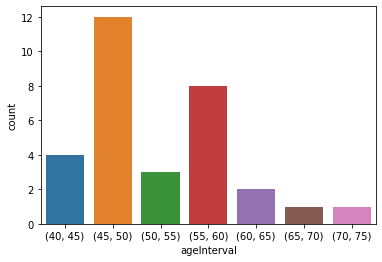

In [101]:
sns.countplot(x = 'ageInterval', data = get_coaches_of_league(Premier_League_Teams, Premier_League_Matches))

Serie A

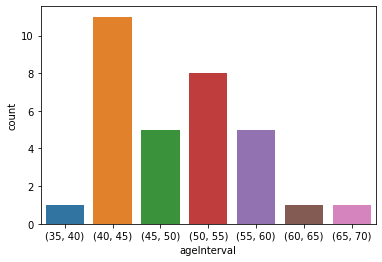

In [102]:
sns.countplot(x = 'ageInterval', data = get_coaches_of_league(Serie_A_Teams, Serie_A_Matches))

La Liga

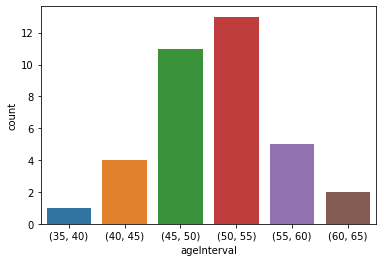

In [103]:
sns.countplot(x = 'ageInterval', data = get_coaches_of_league(La_Liga_Teams, La_Liga_Matches))

Bundesliga

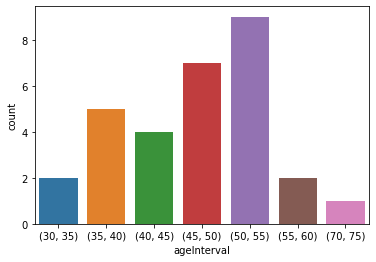

In [104]:
sns.countplot(x = 'ageInterval', data = get_coaches_of_league(Bundesliga_Teams, Bundesliga_Matches))

Ligue 1

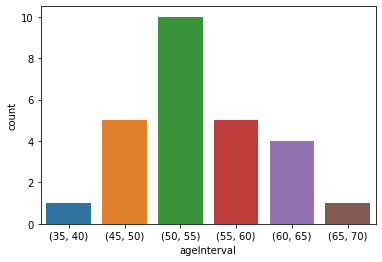

In [105]:
sns.countplot(x = 'ageInterval', data = get_coaches_of_league(Ligue_1_Teams, Ligue_1_Matches))

We can see that coach age distribution can change a lot depending on league, but with every league showing clear patterns.

## RQ4

We start by getting subtables of passes and accurate passes.

In [106]:
England_Pass = events_England[events_England['eventName'] == 'Pass']
Germany_Pass = events_Germany[events_Germany['eventName'] == 'Pass']
Italy_Pass = events_Italy[events_Italy['eventName'] == 'Pass']
Spain_Pass = events_Spain[events_Spain['eventName'] == 'Pass']
France_Pass = events_France[events_France['eventName'] == 'Pass']

In [107]:
England_Accurate = England_Pass[England_Pass.apply(lambda x : {'id' : 1801} in x['tags'], axis = 1)]
France_Accurate = France_Pass[France_Pass.apply(lambda x : {'id' : 1801} in x['tags'], axis = 1)]
Italy_Accurate = Italy_Pass[Italy_Pass.apply(lambda x : {'id' : 1801} in x['tags'], axis = 1)]
Spain_Accurate = Spain_Pass[Spain_Pass.apply(lambda x : {'id' : 1801} in x['tags'], axis = 1)]
Germany_Accurate = Germany_Pass[Germany_Pass.apply(lambda x : {'id' : 1801} in x['tags'], axis = 1)]

We compute average number of passes a player do in a game so we can select only players who played at least two games of passes.

In [108]:
nEng=len(England_Pass)/(22*(38*10))
nSpa=len(Spain_Pass)/(22*(38*10))
nFra=len(France_Pass)/(22*(38*10))
nIta=len(Italy_Pass)/(22*(38*10))
nGer=len(Germany_Pass)/(22*(34*9))

We count, creating dataframes, for each player id how many attempted passage and completed passage.

In [109]:
Germany_Pass = Germany_Pass.groupby('playerId').count()[['eventName']]
Germany_Accurate = Germany_Accurate.groupby('playerId').count()[['eventName']]
Italy_Pass = Italy_Pass.groupby('playerId').count()[['eventName']]
Italy_Accurate = Italy_Accurate.groupby('playerId').count()[['eventName']]
France_Pass = France_Pass.groupby('playerId').count()[['eventName']]
France_Accurate = France_Accurate.groupby('playerId').count()[['eventName']]
Spain_Pass = Spain_Pass.groupby('playerId').count()[['eventName']]
Spain_Accurate = Spain_Accurate.groupby('playerId').count()[['eventName']]
England_Pass = England_Pass.groupby('playerId').count()[['eventName']]
England_Accurate = England_Accurate.groupby('playerId').count()[['eventName']]

We visualise data to be sure everything is ok.

In [110]:
England_Pass

,eventName
playerId,
0,6
36,898
38,224
48,2370
54,2196
...,...
448708,6
450826,17
486252,226


We merge, for every league, the two tables passes and accurate passes.

In [111]:
Germany_merge = pd.merge(Germany_Pass, Germany_Accurate, on ='playerId')
Italy_merge = pd.merge(Italy_Pass, Italy_Accurate, on ='playerId')
England_merge = pd.merge(England_Pass, England_Accurate, on ='playerId')
Spain_merge = pd.merge(Spain_Pass, Spain_Accurate, on ='playerId')
France_merge = pd.merge(France_Pass, France_Accurate, on ='playerId')

We now insert *ratio* (accuarate passes / all passes) column in our tables.

In [112]:
Germany_merge["ratio"] = (Germany_merge["eventName_y"] / Germany_merge["eventName_x"])
Italy_merge["ratio"] = (Italy_merge["eventName_y"] / Italy_merge["eventName_x"])
England_merge["ratio"] = (England_merge["eventName_y"] / England_merge["eventName_x"])
Spain_merge["ratio"] = (Spain_merge["eventName_y"] / Spain_merge["eventName_x"])
France_merge["ratio"] = (France_merge["eventName_y"] / France_merge["eventName_x"])

We select only players who have played at least two average games of passes.

In [113]:
Germany_merge = Germany_merge[Germany_merge.apply(lambda x : x['eventName_x'] > nGer, axis = 1)]
England_merge = England_merge[England_merge.apply(lambda x : x['eventName_x'] > nEng, axis = 1)]
Italy_merge = Italy_merge[Italy_merge.apply(lambda x : x['eventName_x'] > nIta, axis = 1)]
Spain_merge = Spain_merge[Spain_merge.apply(lambda x : x['eventName_x'] > nSpa, axis = 1)]
France_merge = France_merge[France_merge.apply(lambda x : x['eventName_x'] > nFra, axis = 1)]

We sort every table by ratio.

In [115]:
England_merge = England_merge.sort_values(by = ['ratio'], ascending = False)
Italy_merge = Italy_merge.sort_values(by = ['ratio'], ascending = False)
Germany_merge = Germany_merge.sort_values(by = ['ratio'], ascending = False)
France_merge = France_merge.sort_values(by = ['ratio'], ascending = False)
Spain_merge = Spain_merge.sort_values(by = ['ratio'], ascending = False)

Finally for every league we get the ten players with highest ratio.

Premier League

In [116]:
for playerId, player in England_merge.head(10).iterrows():
    name = All_Players[All_Players['wyId'] == playerId].iloc[0]['shortName']
    print(name + " - ratio: " + str(player['ratio']))

J. Stones - ratio: 0.9759136212624585
Y. Tour\u00e9 - ratio: 0.948019801980198
F. Delph - ratio: 0.9450757575757576
V. Kompany - ratio: 0.9432063263838965
A. Christensen - ratio: 0.9402173913043478
P. Mertesacker - ratio: 0.9399141630901288
P. Jones - ratio: 0.9385052034058656
N. Otamendi - ratio: 0.9375843454790823
Mohamed Elneny - ratio: 0.9364508393285371
\u0130. G\u00fcndo\u011fan - ratio: 0.9355555555555556


Serie A

In [117]:
for playerId, player in Italy_merge.head(10).iterrows():
    name = All_Players[All_Players['wyId'] == playerId].iloc[0]['shortName']
    print(name + " - ratio: " + str(player['ratio']))

N. Maksimovi\u0107 - ratio: 0.9824561403508771
L. Tonelli - ratio: 0.9619047619047619
P. Gollini - ratio: 0.9453125
A. Diawara - ratio: 0.9396551724137931
A. Barzagli - ratio: 0.9389830508474576
D. Rugani - ratio: 0.9346938775510204
H. Moreno - ratio: 0.934010152284264
M. Benatia - ratio: 0.9327354260089686
A. Danzi - ratio: 0.9301075268817204
V. Chiriche\u0219 - ratio: 0.9284403669724771


Bundesliga

In [118]:
for playerId, player in Germany_merge.head(10).iterrows():
    name = All_Players[All_Players['wyId'] == playerId].iloc[0]['shortName']
    print(name + " - ratio: " + str(player['ratio']))

M. Compper - ratio: 0.9655172413793104
M. Esser - ratio: 0.9629629629629629
Y. Bisseck - ratio: 0.9473684210526315
A. Luthe - ratio: 0.9322033898305084
F. Passlack - ratio: 0.9302325581395349
D. Maroh - ratio: 0.929384965831435
N. S\u00fcle - ratio: 0.928709055876686
Thiago Alc\u00e2ntara - ratio: 0.9284565916398714
D. Zakaria - ratio: 0.9214659685863874
\u00d6. Toprak - ratio: 0.9209006928406467


La Liga

In [119]:
for playerId, player in Spain_merge.head(10).iterrows():
    name = All_Players[All_Players['wyId'] == playerId].iloc[0]['shortName']
    print(name + " - ratio: " + str(player['ratio']))

Fabio Gonz\u00e1lez - ratio: 0.975609756097561
T. Vermaelen - ratio: 0.9503311258278145
Y. Mina - ratio: 0.9473684210526315
Marcos Llorente - ratio: 0.9434889434889435
Javi Garc\u00eda - ratio: 0.9417352754908169
M. Kova\u010di\u0107 - ratio: 0.9375812743823146
T. Kroos - ratio: 0.9366700715015321
A. Mandi - ratio: 0.9351485148514852
Dani Ceballos - ratio: 0.9348441926345609
S. Umtiti - ratio: 0.9337231968810916


Ligue 1

In [120]:
for playerId, player in France_merge.head(10).iterrows():
    name = All_Players[All_Players['wyId'] == playerId].iloc[0]['shortName']
    print(name + " - ratio: " + str(player['ratio']))

A. Ribelin - ratio: 0.9642857142857143
Marlon - ratio: 0.9611576542269612
Thiago Silva - ratio: 0.9598269468479604
P. Kimpembe - ratio: 0.9519175729822553
T. Motta - ratio: 0.9468334636434714
A. Abdennour - ratio: 0.9467084639498433
Y. Cardinale - ratio: 0.945054945054945
A. Soumaoro - ratio: 0.9437386569872959
Marquinhos - ratio: 0.9408020369191598
A. Ar\u00e9ola - ratio: 0.9388145315487572


Looking at these we can see that defensors are the players who tend to have the highest ratio.

## RQ5

Get the dataframe function

In [128]:
def air_duels(team, event):
    result = pd.merge(All_Players, pd.merge(team, event, left_on = 'wyId', right_on = 'teamId'), left_on = 'wyId', right_on = 'playerId')
    air_duels_dropped_columns = ['wyId_x', 'wyId_y', 'nation']
    result = result.drop(air_duels_dropped_columns, axis = 1)
    result = result.rename(columns={'name': 'team'})
    result = result[result.apply(lambda x: x['subEventName'] == 'Air duel', axis = 1)]
    return(result)

In [129]:
premier_league_duels =  air_duels(Premier_League_Teams, events_England)
La_Liga_duels = air_duels(La_Liga_Teams, events_Spain)
Serie_A_duels = air_duels(Serie_A_Teams, events_Italy)
Ligue_1_duels = air_duels(Ligue_1_Teams, events_France)
BundesLiga_duels = air_duels(Bundesliga_Teams, events_Germany)

We visualise the table to make sure everithing is ok.

In [130]:
premier_league_duels.head()

,firstName,middleName,lastName,height,shortName,team,longestWinStreak,longestLoseStreak,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId
3,Toby,,Alderweireld,187,T. Alderweireld,Tottenham Hotspur,6,1,1,Air duel,"[{'id': 701}, {'id': 1802}]",36,"[{'y': 75, 'x': 27}, {'y': 60, 'x': 24}]",2499725,Duel,1624,1H,208.071799,10
7,Toby,,Alderweireld,187,T. Alderweireld,Tottenham Hotspur,6,1,1,Air duel,"[{'id': 701}, {'id': 1802}]",36,"[{'y': 44, 'x': 89}, {'y': 68, 'x': 76}]",2499725,Duel,1624,1H,456.618090,10
17,Toby,,Alderweireld,187,T. Alderweireld,Tottenham Hotspur,6,1,1,Air duel,"[{'id': 703}, {'id': 1801}]",36,"[{'y': 73, 'x': 33}, {'y': 40, 'x': 63}]",2499725,Duel,1624,1H,991.035417,10
38,Toby,,Alderweireld,187,T. Alderweireld,Tottenham Hotspur,6,1,1,Air duel,"[{'id': 703}, {'id': 1801}]",36,"[{'y': 52, 'x': 6}, {'y': 39, 'x': 9}]",2499725,Duel,1624,1H,2009.106642,10
39,Toby,,Alderweireld,187,T. Alderweireld,Tottenham Hotspur,6,1,1,Air duel,"[{'id': 703}, {'id': 1801}]",36,"[{'y': 70, 'x': 36}, {'y': 67, 'x': 67}]",2499725,Duel,1624,1H,2139.051323,10


We define some useful functions.

In [131]:
def win_or_lose(tags):
    if({'id' : 1801} in tags):
        return("Won")
    return("Lose")

def win_unique(duels):
    result = duels[duels.apply(lambda x: x['Status'] == 'Won', axis = 1)]
    result = result[['playerId', 'Status']]
    result.columns = ['playerId', 'n_win']
    result = result.groupby('playerId').count()
    return result

# Function to retrive aggregate dataframe which resulting the attemp air duel
# from status colum of each player
def attemp_unique(duels):
    result = duels[['playerId','subEventName']]
    result.columns = ['playerId', 'n_attempted']
    result = result.groupby('playerId').count()
    return result

#Function to merge win and add ratio from previous dataframe
def merge_unique(duels):
    result = pd.merge(win_unique(duels), attemp_unique(duels), on = 'playerId')
    result['ratio'] = (result['n_win'] / result['n_attempted'])
    return result

#Merge the duel and check dataframe to get height colmn
def merge_final (duels, check):
    result = pd.merge( duels,check, on = 'playerId')
    column_dropped = [ 'team',  'subEventName', 'tags','teamId', 'Status']
    result = result.drop(column_dropped, axis = 1)
    result = result.drop_duplicates('playerId')
    return result
# Function to filter out the outlier from based on attempted air duels
# higher attempted air duels -> ratio approachs 0.0000.. value, which is 
# not giving significant value to this case, and based on the table quite acts
# like an outlier
# There are some error value in height column(height = 0), filter out those variable 
def filterd_df (df, tshld):
    return df[df.apply(lambda x: x['n_attempted'] > round(tshld) and x['height'] > 0, axis = 1)]

Add a *status* column and drop everything we don't need.

In [132]:
premier_league_duels['Status'] = premier_league_duels.apply(lambda x : win_or_lose(x['tags']), axis = 1)
La_Liga_duels['Status'] = La_Liga_duels.apply(lambda x : win_or_lose(x['tags']), axis = 1)
Serie_A_duels['Status'] = Serie_A_duels.apply(lambda x : win_or_lose(x['tags']), axis = 1)
Ligue_1_duels['Status'] = Ligue_1_duels.apply(lambda x : win_or_lose(x['tags']), axis = 1)
BundesLiga_duels['Status'] = BundesLiga_duels.apply(lambda x : win_or_lose(x['tags']), axis = 1)

In [133]:
premier_league_duels.head()

,firstName,middleName,lastName,height,shortName,team,longestWinStreak,longestLoseStreak,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,Status
3,Toby,,Alderweireld,187,T. Alderweireld,Tottenham Hotspur,6,1,1,Air duel,"[{'id': 701}, {'id': 1802}]",36,"[{'y': 75, 'x': 27}, {'y': 60, 'x': 24}]",2499725,Duel,1624,1H,208.071799,10,Lose
7,Toby,,Alderweireld,187,T. Alderweireld,Tottenham Hotspur,6,1,1,Air duel,"[{'id': 701}, {'id': 1802}]",36,"[{'y': 44, 'x': 89}, {'y': 68, 'x': 76}]",2499725,Duel,1624,1H,456.618090,10,Lose
17,Toby,,Alderweireld,187,T. Alderweireld,Tottenham Hotspur,6,1,1,Air duel,"[{'id': 703}, {'id': 1801}]",36,"[{'y': 73, 'x': 33}, {'y': 40, 'x': 63}]",2499725,Duel,1624,1H,991.035417,10,Won
38,Toby,,Alderweireld,187,T. Alderweireld,Tottenham Hotspur,6,1,1,Air duel,"[{'id': 703}, {'id': 1801}]",36,"[{'y': 52, 'x': 6}, {'y': 39, 'x': 9}]",2499725,Duel,1624,1H,2009.106642,10,Won
39,Toby,,Alderweireld,187,T. Alderweireld,Tottenham Hotspur,6,1,1,Air duel,"[{'id': 703}, {'id': 1801}]",36,"[{'y': 70, 'x': 36}, {'y': 67, 'x': 67}]",2499725,Duel,1624,1H,2139.051323,10,Won


Create data frame of winning and attemped air duel of each player for all league

In [134]:
premier_league_check = merge_unique(premier_league_duels)
La_Liga_duels_check = merge_unique(La_Liga_duels)
Serie_A_duels_check = merge_unique(Serie_A_duels)
Ligue_1_duels_check = merge_unique(Ligue_1_duels)
BundesLiga_duels_check = merge_unique(BundesLiga_duels)

check

In [135]:
premier_league_check

,n_win,n_attempted,ratio
playerId,,,
36,27,55,0.490909
38,12,19,0.631579
48,153,213,0.718310
54,22,52,0.423077
56,3,8,0.375000
...,...,...,...
447205,1,2,0.500000
447379,2,6,0.333333
447812,8,15,0.533333


Merge final dataframe for all league

In [136]:
premier_league_duels_df = merge_final(premier_league_duels, premier_league_check)
La_Liga_duels_df = merge_final(La_Liga_duels, La_Liga_duels_check)
Serie_A_duels_df = merge_final(Serie_A_duels, Serie_A_duels_check)
Ligue_1_duels_df = merge_final(Ligue_1_duels, Ligue_1_duels_check)
BundesLiga_duels_df = merge_final(BundesLiga_duels, BundesLiga_duels_check)

Check

In [137]:
premier_league_duels_df

,firstName,middleName,lastName,height,shortName,longestWinStreak,longestLoseStreak,eventId,playerId,positions,matchId,eventName,matchPeriod,eventSec,subEventId,n_win,n_attempted,ratio
0,Toby,,Alderweireld,187,T. Alderweireld,6,1,1,36,"[{'y': 75, 'x': 27}, {'y': 60, 'x': 24}]",2499725,Duel,1H,208.071799,10,27,55,0.490909
55,Jan,,Vertonghen,189,J. Vertonghen,6,1,1,48,"[{'y': 56, 'x': 32}, {'y': 71, 'x': 43}]",2499725,Duel,1H,802.905924,10,153,213,0.718310
268,Christian,,Dannemann Eriksen,180,C. Eriksen,6,1,1,54,"[{'y': 83, 'x': 75}, {'y': 100, 'x': 66}]",2499725,Duel,1H,2324.020557,10,22,52,0.423077
320,Johann,,Berg Gu\u00f0munds\u00adson,186,J. Gu\u00f0munds\u00adson,5,3,1,93,"[{'y': 69, 'x': 43}, {'y': 68, 'x': 70}]",2499721,Duel,1H,371.356100,10,55,100,0.550000
420,Nordin,,Amrabat,178,N. Amrabat,2,4,1,32968,"[{'y': 77, 'x': 63}, {'y': 67, 'x': 70}]",2499727,Duel,1H,386.520079,10,4,11,0.363636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32978,Phil,,Foden,175,P. Foden,18,1,1,447205,"[{'y': 28, 'x': 78}, {'y': 33, 'x': 71}]",2500065,Duel,2H,2353.184944,10,1,2,0.500000
32980,Beni,,Baningime,178,B. Baningime,2,3,1,447379,"[{'y': 70, 'x': 66}, {'y': 68, 'x': 54}]",2499814,Duel,2H,279.287011,10,2,6,0.333333
32986,Thomas,,Edwards,175,T. Edwards,1,4,1,447812,"[{'y': 82, 'x': 56}, {'y': 83, 'x': 72}]",2499906,Duel,1H,858.494107,10,8,15,0.533333
33001,Harvey,,Barnes,174,H. Barnes,4,2,1,448708,"[{'y': 42, 'x': 91}, {'y': 43, 'x': 90}]",2500064,Duel,2H,2824.174998,10,1,1,1.000000


Set treshold of each airduels

In [139]:
nEng=len(premier_league_duels)/(22*(38*10))
nSpa=len(La_Liga_duels)/(22*(38*10))
nFra=len(Ligue_1_duels)/(22*(38*10))
nIta=len(Serie_A_duels)/(22*(38*10))
nGer=len(BundesLiga_duels)/(22*(34*9))

Apply the treshold for each dataframe

In [140]:
premier_league_duels_df_ = filterd_df(premier_league_duels_df, nFra)
La_Liga_duels_df_ = filterd_df(La_Liga_duels_df, nFra)
Serie_A_duels_df_ = filterd_df(Serie_A_duels_df, nFra)
Ligue_1_duels_df_ = filterd_df(Ligue_1_duels_df, nFra)
BundesLiga_duels_df_ = filterd_df(BundesLiga_duels_df, nFra)

[Height ~ Ratio] Scatter Plot and Regression Plot 

Premier League

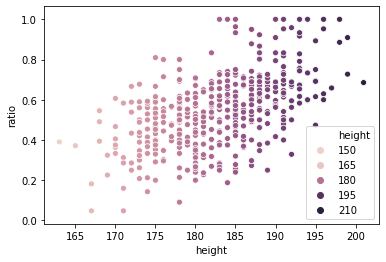

In [141]:
sns.scatterplot(x = 'height', y = 'ratio', hue = 'height', data = premier_league_duels_df_)

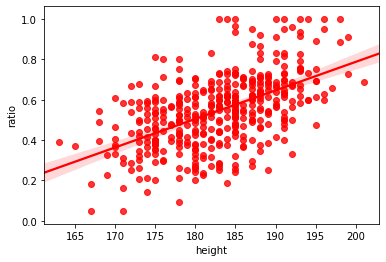

In [142]:
sns.regplot(x = 'height', y = 'ratio', color = 'red', data = premier_league_duels_df_)

LA Liga

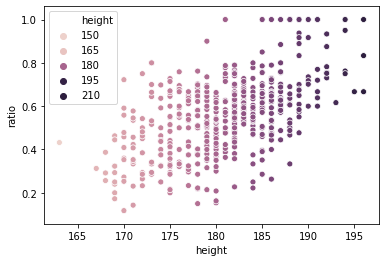

In [143]:
sns.scatterplot(x = 'height', y = 'ratio', hue = 'height', data = La_Liga_duels_df_)

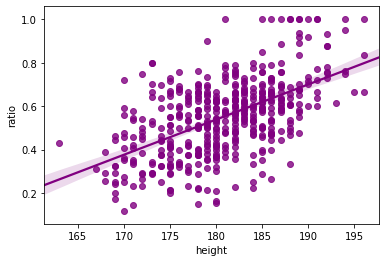

In [144]:
sns.regplot(x = 'height', y = 'ratio', color = 'purple', data = La_Liga_duels_df_)

Serie A

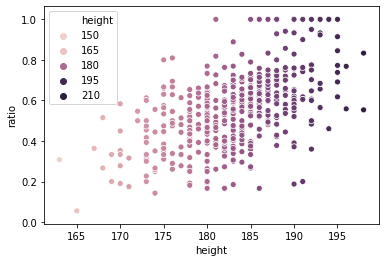

In [145]:
sns.scatterplot(x = 'height', y = 'ratio', hue = 'height', data = Serie_A_duels_df_)

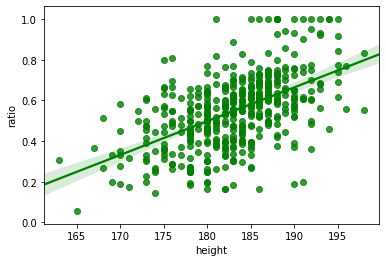

In [146]:
sns.regplot(x = 'height', y = 'ratio', color = 'green', data = Serie_A_duels_df_)

Ligue 1

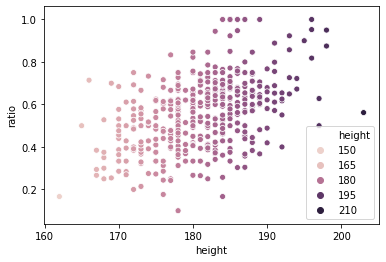

In [147]:
sns.scatterplot(x = 'height', y = 'ratio', hue = 'height', data = Ligue_1_duels_df_)

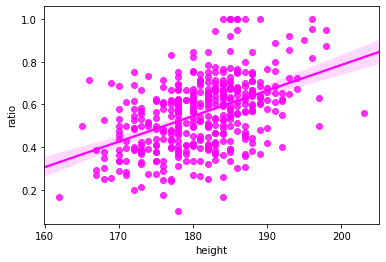

In [148]:
sns.regplot(x = 'height', y = 'ratio', color = 'magenta', data = Ligue_1_duels_df_)

Bundes Liga

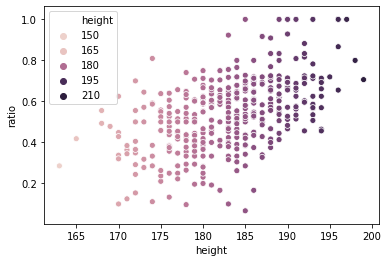

In [149]:
sns.scatterplot(x = 'height', y = 'ratio', hue = 'height', data = BundesLiga_duels_df_)

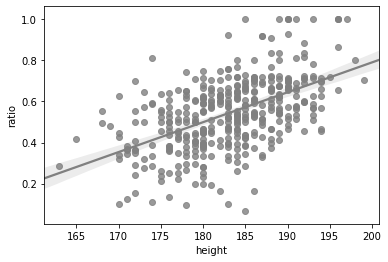

In [150]:
sns.regplot(x = 'height', y = 'ratio', color = 'grey', data = BundesLiga_duels_df_)

Based on the result, we see that there is some positive correlation between height and the ratio to win the air duels in match

## CRQ1

We start by selecting subtables of goal events and dropping everything we don't need.

In [151]:
La_Liga_Goals = events_Spain[events_Spain.apply(lambda x : {'id' : 101} in x['tags'], axis = 1)]
Serie_A_Goals = events_Italy[events_Italy.apply(lambda x : {'id' : 101} in x['tags'], axis = 1)]
Ligue_1_Goals = events_France[events_France.apply(lambda x : {'id' : 101} in x['tags'], axis = 1)]
Premier_League_Goals = events_England[events_England.apply(lambda x : {'id' : 101} in x['tags'], axis = 1)]
Bundesliga_Goals = events_Germany[events_Germany.apply(lambda x : {'id' : 101} in x['tags'], axis = 1)]

La_Liga_Goals = La_Liga_Goals.drop(['eventId', 'subEventName', 'positions', 'eventName', 'subEventId'], axis = 1)
Serie_A_Goals = Serie_A_Goals.drop(['eventId', 'subEventName', 'positions', 'eventName', 'subEventId'], axis = 1)
Premier_League_Goals = Premier_League_Goals.drop(['eventId', 'subEventName', 'positions', 'eventName', 'subEventId'], axis = 1)
Ligue_1_Goals = Ligue_1_Goals.drop(['eventId', 'subEventName', 'positions', 'eventName', 'subEventId'], axis = 1)
Bundesliga_Goals = Bundesliga_Goals.drop(['eventId', 'subEventName', 'positions', 'eventName', 'subEventId'], axis = 1)

We update our tables to add a *eventInterval* column.

In [152]:
def update(seconds, matchPeriod):
    seconds = int(seconds / 60)
    if(matchPeriod == '1H'):
        intero = seconds // 9
        if(intero > 4):
            return("45+")
        return("[" + str(intero * 9) + ", " + str((intero + 1) * 9) + "]")
    elif(matchPeriod == '2H'):
        intero = seconds // 9 + 4
        if(intero >= 9):
            return("90+")
        return("[" + str((intero + 1) * 9) + ", " + str((intero + 2) * 9) + "]")
    else:
        return("Extra")

La_Liga_Goals['eventInterval'] = La_Liga_Goals.apply(lambda x : update(x['eventSec'], x['matchPeriod']), axis = 1)
Premier_League_Goals['eventInterval'] = Premier_League_Goals.apply(lambda x : update(x['eventSec'], x['matchPeriod']), axis = 1)
Bundesliga_Goals['eventInterval'] = Bundesliga_Goals.apply(lambda x : update(x['eventSec'], x['matchPeriod']), axis = 1)
Serie_A_Goals['eventInterval'] = Serie_A_Goals.apply(lambda x : update(x['eventSec'], x['matchPeriod']), axis = 1)
Ligue_1_Goals['eventInterval'] = Ligue_1_Goals.apply(lambda x : update(x['eventSec'], x['matchPeriod']), axis = 1)

We define some functions and variables which we'll be of use to accomplish our goals.

In [153]:
# Get a dict of goal frequencies for a given league
def get_goal_dict(league):
    dictionary = defaultdict(lambda : 0)
    for interval in set(league.eventInterval):
        dictionary[interval] = len(league.query('eventInterval == "' + interval + '"').index)
    return(dictionary)

La_Liga_Goal_Frequency = get_goal_dict(La_Liga_Goals)
Serie_A_Goal_Frequency = get_goal_dict(Serie_A_Goals)
Premier_League_Goal_Frequency = get_goal_dict(Premier_League_Goals)
Bundesliga_Goal_Frequency = get_goal_dict(Bundesliga_Goals)
Ligue_1_Goal_Frequency = get_goal_dict(Ligue_1_Goals)

We plot data we have just found.

Premier League

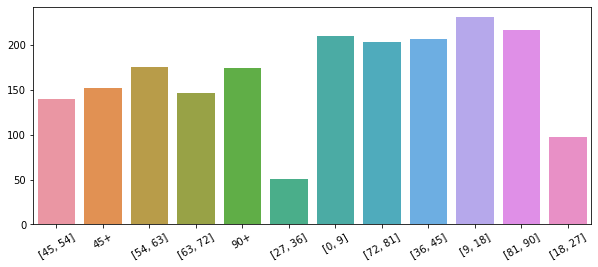

In [154]:
plt.figure(figsize = (10, 4))
Dict = dict(Premier_League_Goal_Frequency)
ax = sns.barplot(x = list(Dict.keys()), y = list(Dict.values()), order = ['[0, 9]', '[9, 18]', '[18, 27]', '[27, 36]', '[36, 45]', '45+', '[45, 54]', '[54, 63]', '[63, 72]', '[72, 81]', '[81, 90]', '90+'])
ax.set_xticklabels(labels = list(Dict.keys()), rotation = 30)
plt.show()

Serie A

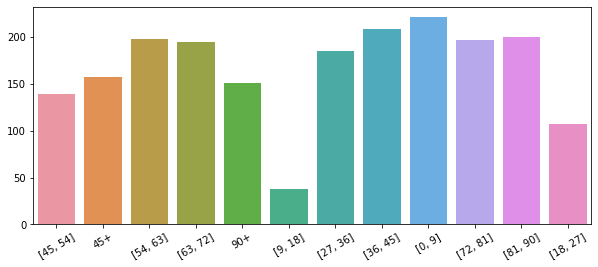

In [155]:
plt.figure(figsize = (10, 4))
Dict = dict(Serie_A_Goal_Frequency)
ax = sns.barplot(x = list(Dict.keys()), y = list(Dict.values()), order = ['[0, 9]', '[9, 18]', '[18, 27]', '[27, 36]', '[36, 45]', '45+', '[45, 54]', '[54, 63]', '[63, 72]', '[72, 81]', '[81, 90]', '90+'])
ax.set_xticklabels(labels = list(Dict.keys()), rotation = 30)
plt.show()

La Liga

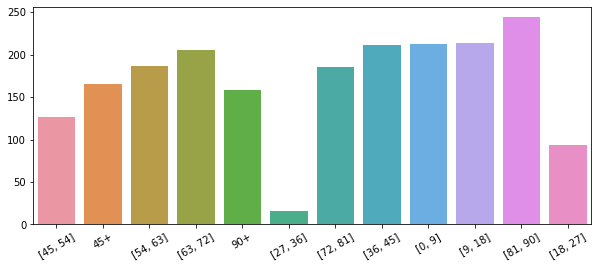

In [156]:
plt.figure(figsize = (10, 4))
Dict = dict(La_Liga_Goal_Frequency)
ax = sns.barplot(x = list(Dict.keys()), y = list(Dict.values()), order = ['[0, 9]', '[9, 18]', '[18, 27]', '[27, 36]', '[36, 45]', '45+', '[45, 54]', '[54, 63]', '[63, 72]', '[72, 81]', '[81, 90]', '90+'])
ax.set_xticklabels(labels = list(Dict.keys()), rotation = 30)
plt.show()

Bundesliga

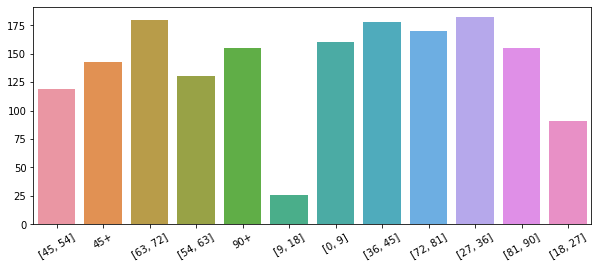

In [157]:
plt.figure(figsize = (10, 4))
Dict = dict(Bundesliga_Goal_Frequency)
ax = sns.barplot(x = list(Dict.keys()), y = list(Dict.values()), order = ['[0, 9]', '[9, 18]', '[18, 27]', '[27, 36]', '[36, 45]', '45+', '[45, 54]', '[54, 63]', '[63, 72]', '[72, 81]', '[81, 90]', '90+'])
ax.set_xticklabels(labels = list(Dict.keys()), rotation = 30)
plt.show()

Ligue 1

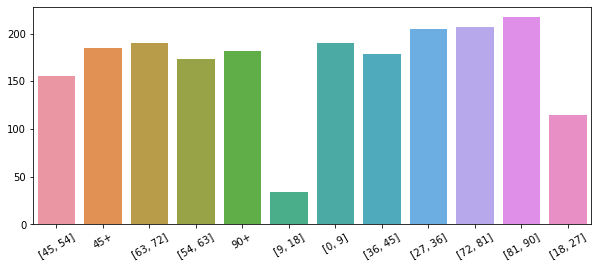

In [158]:
plt.figure(figsize = (10, 4))
Dict = dict(Ligue_1_Goal_Frequency)
ax = sns.barplot(x = list(Dict.keys()), y = list(Dict.values()), order = ['[0, 9]', '[9, 18]', '[18, 27]', '[27, 36]', '[36, 45]', '45+', '[45, 54]', '[54, 63]', '[63, 72]', '[72, 81]', '[81, 90]', '90+'])
ax.set_xticklabels(labels = list(Dict.keys()), rotation = 30)
plt.show()

We continue now defining functions to answer other questions.

In [159]:
# Get the number of goals a given team has done in a given interval
def get_goals_of_team(goals_table, teams_table, team_id, interval):
    goals_query = "teamId == " + str(team_id) + " and eventInterval == '" + interval + "'"
    return(len(goals_table.query(goals_query).index))

# We define a functions which gives a dictionary of teams : scored goals in a given interval
def get_teams_goals(teams_table, goals_table, interval):
    dictionary = {}
    for _, team in teams_table.iterrows():
        dictionary[team['name']] = get_goals_of_team(goals_table, teams_table, team['wyId'], interval)
    return(dictionary)

# Now we ordered the get_teams_goals dictionary (into a list)
def get_ordered_teams_goals(teams_table, goals_table, interval):
    lista = get_teams_goals(teams_table, goals_table, interval).items()
    return(sorted(lista, key = lambda x : x[1], reverse = True))

We find for each league the top three team who scored most goals on interval [81, 90]

In [160]:
print("La Liga:")
for element in get_ordered_teams_goals(La_Liga_Teams, La_Liga_Goals, "[81, 90]")[:3]:
    print(element[0] + " - " + str(element[1]))
print("")

print("Serie A:")
for element in get_ordered_teams_goals(Serie_A_Teams, Serie_A_Goals, "[81, 90]")[:3]:
    print(element[0] + " - " + str(element[1]))
print("")
    
print("Bundesliga:")
for element in get_ordered_teams_goals(Bundesliga_Teams, Bundesliga_Goals, "[81, 90]")[:3]:
    print(element[0] + " - " + str(element[1]))
print("")
    
print("Ligue 1:")
for element in get_ordered_teams_goals(Ligue_1_Teams, Ligue_1_Goals, "[81, 90]")[:3]:
    print(element[0] + " - " + str(element[1]))
print("")
    
print("Premier League:")
for element in get_ordered_teams_goals(Premier_League_Teams, Premier_League_Goals, "[81, 90]")[:3]:
    print(element[0] + " - " + str(element[1]))
print("")

La Liga:
Real Madrid - 21
Barcelona - 21
Deportivo La Coru\u00f1a - 18

Serie A:
Chievo - 16
Sampdoria - 13
Internazionale - 13

Bundesliga:
Hannover 96 - 16
Hoffenheim - 15
Augsburg - 13

Ligue 1:
Olympique Lyonnais - 18
PSG - 18
Rennes - 17

Premier League:
Watford - 16
Arsenal - 16
West Ham United - 15



To continue we need an All_Goals table which we're going to create by merging our previously goals tables.

In [161]:
All_Goals = pd.concat([La_Liga_Goals, Serie_A_Goals, Bundesliga_Goals, Ligue_1_Goals, Premier_League_Goals], ignore_index = True)

In [162]:
All_Goals

,tags,playerId,matchId,teamId,matchPeriod,eventSec,eventInterval
0,"[{'id': 101}, {'id': 402}, {'id': 1202}, {'id'...",225089,2565548,695,2H,2571.818575,"[81, 90]"
1,"[{'id': 101}, {'id': 1202}, {'id': 1802}]",3486,2565548,682,2H,2574.266559,"[81, 90]"
2,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",395636,2565549,692,1H,1300.582823,"[18, 27]"
3,"[{'id': 101}, {'id': 1204}, {'id': 1802}]",86212,2565549,687,1H,1303.507205,"[18, 27]"
4,"[{'id': 101}, {'id': 401}, {'id': 201}, {'id':...",355599,2565549,687,1H,1934.155903,"[27, 36]"
...,...,...,...,...,...,...,...
9738,"[{'id': 101}, {'id': 1203}, {'id': 1802}]",10131,2500098,1623,2H,1076.658523,"[54, 63]"
9739,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",145692,2500098,1623,2H,1737.064842,"[72, 81]"
9740,"[{'id': 101}, {'id': 1206}, {'id': 1802}]",3582,2500098,1633,2H,1739.579587,"[72, 81]"
9741,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",41174,2500098,1633,2H,2193.887080,"[81, 90]"


We keep defining functions.

In [163]:
# Given a player we want the goals table of that player
def get_player_goals_table(playerId):
    return(All_Goals.query("playerId == " + str(playerId)))

# Search for players who scored at least one goal on 8 different intervals
def scored_every_interval(playerId):
    goals_of_player = get_player_goals_table(playerId)
    setInterval = set(goals_of_player.eventInterval)
    return(len(setInterval) >= 8)

We add a *scoredIn8Interval* column to our All_Player table.

In [164]:
All_Players['ScoredIn8Intervals'] = All_Players.apply(lambda x : scored_every_interval(x['wyId']), axis = 1)

We get player who scored goals in at least eight different intervals.

In [165]:
All_Players.query("ScoredIn8Intervals == True")

,firstName,middleName,lastName,height,wyId,shortName,ScoredIn8Intervals
21,Memphis,,Depay,176,118,M. Depay,True
22,Dries,,Mertens,169,122,D. Mertens,True
128,Emiliano,,Viviano,195,20802,E. Viviano,True
129,Maximiliano,,G\u00f3mez Gonz\u00e1lez,186,395636,Maxi G\u00f3mez,True
131,Thomas,,Strakosha,186,166534,T. Strakosha,True
...,...,...,...,...,...,...,...
3018,Wilfried,,Zaha,180,8422,W. Zaha,True
3037,Riyad,,Mahrez,179,26150,R. Mahrez,True
3072,Loris,,Karius,190,15175,L. Karius,True
3366,Nabil,,Fekir,173,28115,N. Fekir,True


## CRQ2

We define a function for drawing a football pinch.

In [166]:
def draw_pitch(ax):
    # size of the pitch is 120, 80
    #Create figure

    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,80], color="black")
    plt.plot([0,120],[80,80], color="black")
    plt.plot([120,120],[80,0], color="black")
    plt.plot([120,0],[0,0], color="black")
    plt.plot([60,60],[0,80], color="black")

    #Left Penalty Area
    plt.plot([14.6,14.6],[57.8,22.2],color="black")
    plt.plot([0,14.6],[57.8,57.8],color="black")
    plt.plot([0,14.6],[22.2,22.2],color="black")

    #Right Penalty Area
    plt.plot([120,105.4],[57.8,57.8],color="black")
    plt.plot([105.4,105.4],[57.8,22.5],color="black")
    plt.plot([120, 105.4],[22.5,22.5],color="black")

    #Left 6-yard Box
    plt.plot([0,4.9],[48,48],color="black")
    plt.plot([4.9,4.9],[48,32],color="black")
    plt.plot([0,4.9],[32,32],color="black")

    #Right 6-yard Box
    plt.plot([120,115.1],[48,48],color="black")
    plt.plot([115.1,115.1],[48,32],color="black")
    plt.plot([120,115.1],[32,32],color="black")

    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black",fill=False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")

    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)

    #Prepare Arcs
    # arguments for arc
    # x, y coordinate of centerpoint of arc
    # width, height as arc might not be circle, but oval
    # angle: degree of rotation of the shape, anti-clockwise
    # theta1, theta2, start and end location of arc in degree
    leftArc = Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)

We try the function.

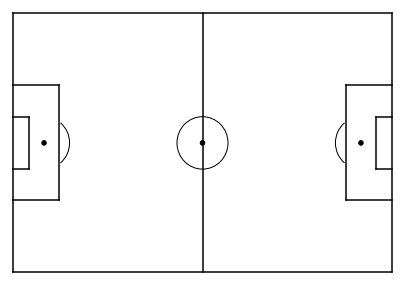

In [167]:
fig=plt.figure() #set up the figures
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax) #overlay our different objects on the pitch
plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.axis('off')
plt.show()

We search for the id of the match we are interested in.

In [168]:
La_Liga_Matches[La_Liga_Matches['label'] == 'Barcelona - Real Madrid, 2 - 2']

,gameweek,teamsData,winner,wyId,label
23,36,"{'675': {'scoreET': 0, 'coachId': 275283, 'sid...",0,2565907,"Barcelona - Real Madrid, 2 - 2"


We define a function to get subevents table of events related to a single match and we get the table of the match we are interested in.

In [169]:
def get_events_of_match(id_match, events):
    return(events[events['matchId'] == id_match])

Events_BRM = get_events_of_match(2565907, events_Spain)

In [170]:
Events_BRM.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId
593455,8,Simple pass,[{'id': 1801}],3321,"[{'y': 49, 'x': 50}, {'y': 40, 'x': 37}]",2565907,Pass,675,1H,3.274992,85
593456,8,Simple pass,[{'id': 1801}],14723,"[{'y': 40, 'x': 37}, {'y': 23, 'x': 30}]",2565907,Pass,675,1H,5.109197,85
593457,8,Simple pass,[{'id': 1801}],3306,"[{'y': 23, 'x': 30}, {'y': 57, 'x': 26}]",2565907,Pass,675,1H,7.109958,85
593458,8,Simple pass,[{'id': 1801}],3309,"[{'y': 57, 'x': 26}, {'y': 40, 'x': 8}]",2565907,Pass,675,1H,8.912297,85
593459,8,Simple pass,[{'id': 1801}],3915,"[{'y': 40, 'x': 8}, {'y': 14, 'x': 11}]",2565907,Pass,675,1H,11.290220,85


We look for id of Messi and Cristiano Ronaldo.

In [171]:
All_Players.query("shortName == 'L. Messi' or shortName == 'Cristiano Ronaldo'")

,firstName,middleName,lastName,height,wyId,shortName,ScoredIn8Intervals
185,Cristiano Ronaldo,,dos Santos Aveiro,187,3322,Cristiano Ronaldo,True
207,Lionel Andr\u00e9s,,Messi Cuccittini,170,3359,L. Messi,True


We find subtables of events by those players.

In [172]:
def get_events_of_player(id_player, events):
    return(events[events['playerId'] == id_player])

Messi_Events = get_events_of_player(3322, Events_BRM)
Ronaldo_Events = get_events_of_player(3359, Events_BRM)

In [173]:
Messi_Events.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId
593473,1,Ground loose ball duel,"[{'id': 702}, {'id': 1801}]",3322,"[{'y': 19, 'x': 49}, {'y': 17, 'x': 49}]",2565907,Duel,675,1H,68.618689,13
593475,1,Air duel,"[{'id': 701}, {'id': 1802}]",3322,"[{'y': 17, 'x': 49}, {'y': 19, 'x': 38}]",2565907,Duel,675,1H,69.411334,10
593497,1,Ground defending duel,"[{'id': 701}, {'id': 1802}]",3322,"[{'y': 13, 'x': 65}, {'y': 23, 'x': 53}]",2565907,Duel,675,1H,114.548692,12
593552,1,Ground attacking duel,"[{'id': 502}, {'id': 703}, {'id': 1801}]",3322,"[{'y': 12, 'x': 93}, {'y': 8, 'x': 97}]",2565907,Duel,675,1H,275.327960,11
593554,8,Cross,"[{'id': 401}, {'id': 801}, {'id': 1802}]",3322,"[{'y': 8, 'x': 97}, {'y': 100, 'x': 100}]",2565907,Pass,675,1H,277.578035,80


In [174]:
Ronaldo_Events.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId
593485,8,Simple pass,[{'id': 1801}],3359,"[{'y': 87, 'x': 74}, {'y': 91, 'x': 80}]",2565907,Pass,676,1H,85.701277,85
593489,8,Simple pass,[{'id': 1801}],3359,"[{'y': 87, 'x': 67}, {'y': 71, 'x': 43}]",2565907,Pass,676,1H,92.114223,85
593499,8,Simple pass,[{'id': 1801}],3359,"[{'y': 66, 'x': 58}, {'y': 78, 'x': 75}]",2565907,Pass,676,1H,117.241765,85
593501,1,Ground attacking duel,"[{'id': 702}, {'id': 1801}]",3359,"[{'y': 67, 'x': 65}, {'y': 38, 'x': 63}]",2565907,Duel,676,1H,122.168204,11
593503,8,Simple pass,[{'id': 1801}],3359,"[{'y': 38, 'x': 63}, {'y': 43, 'x': 69}]",2565907,Pass,676,1H,124.686582,85


We need to extract only the event types we are looking for.

In [175]:
Messi_Events = Messi_Events.query("subEventId in [10, 11, 12, 13, 30, 31, 32, 33, 34, 36, 80, 81, 82, 83, 84, 85, 86, 100]")
Ronaldo_Events = Ronaldo_Events.query("subEventId in [10, 11, 12, 13, 30, 31, 32, 33, 34, 36, 80, 81, 82, 83, 84, 85, 86, 100]")

We define a function to get starting locations of events.

In [176]:
def get_starting_locations(events):
    locations = []
    for _, event in events.iterrows():
        location = event['positions'][0]
        to_append = (location['x'], location['y'])
        locations.append(to_append)
    return(locations)

We can now plot the heatmpas we are looking for.

L. Messi

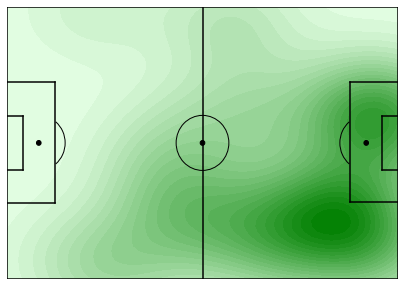

In [177]:
Messi_Locations = get_starting_locations(Messi_Events)

fig = plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)

draw_pitch(ax)
plt.axis('off')

x_coord = [(location[0] / 100) * 120 for location in Messi_Locations]
y_coord = [(location[1] / 100) * 80 for location in Messi_Locations]
sns.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 30)
plt.ylim(0, 80)
plt.xlim(0, 120)

plt.show()

Cristiano Ronaldo

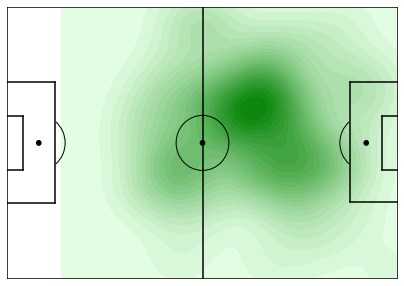

In [178]:
Ronaldo_Locations = get_starting_locations(Ronaldo_Events)

fig = plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)

draw_pitch(ax)
plt.axis('off')

x_coord = [(location[0] / 100) * 120 for location in Ronaldo_Locations]
y_coord = [(location[1] / 100) * 80 for location in Ronaldo_Locations]
sns.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 30)
plt.ylim(0, 80)
plt.xlim(0, 120)

plt.show()

We can see clear differences between the two players. Messi seems to be a lot more aggressive while Ronaldo prefer to play on the center of the pitch. Moreover both player seem to have a favourite side of the pitch.

Now we do something similar to what we have already done, but with the Juventus - Napoli match.

In [179]:
Serie_A_Matches[Serie_A_Matches['label'] == 'Juventus - Napoli, 0 - 1']

,gameweek,teamsData,winner,wyId,label
41,34,"{'3159': {'scoreET': 0, 'coachId': 20386, 'sid...",3187,2576295,"Juventus - Napoli, 0 - 1"


In [180]:
Serie_A_Events = get_events_of_match(2576295, events_Italy)

In [181]:
All_Players.query("shortName == 'Jorginho' or firstName == 'Miralem'")

,firstName,middleName,lastName,height,wyId,shortName,ScoredIn8Intervals
1482,Miralem,,Pjani\u0107,180,20443,M. Pjani\u0107,False
1658,Jorge Luiz,,Frello Filho,180,21315,Jorginho,False


In [182]:
Jorginho_Events = get_events_of_player(21315, Serie_A_Events)
Pjanic_Events = get_events_of_player(20443, Serie_A_Events)

In [183]:
Jorginho_Events.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId
573130,1,Ground defending duel,"[{'id': 502}, {'id': 701}, {'id': 1802}]",21315,"[{'y': 52, 'x': 44}, {'y': 52, 'x': 44}]",2576295,Duel,3187,1H,123.630723,12
573132,2,Foul,[],21315,"[{'y': 52, 'x': 44}, {'y': 52, 'x': 44}]",2576295,Foul,3187,1H,124.797421,20
573145,8,Simple pass,[{'id': 1801}],21315,"[{'y': 75, 'x': 47}, {'y': 71, 'x': 62}]",2576295,Pass,3187,1H,166.338197,85
573164,8,Head pass,"[{'id': 1401}, {'id': 1802}]",21315,"[{'y': 44, 'x': 71}, {'y': 42, 'x': 69}]",2576295,Pass,3187,1H,206.466357,82
573188,8,Simple pass,[{'id': 1801}],21315,"[{'y': 72, 'x': 47}, {'y': 96, 'x': 61}]",2576295,Pass,3187,1H,250.114192,85


In [184]:
Pjanic_Events.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId
573105,8,Simple pass,[{'id': 1801}],20443,"[{'y': 55, 'x': 28}, {'y': 2, 'x': 39}]",2576295,Pass,3159,1H,26.160914,85
573107,8,High pass,[{'id': 1801}],20443,"[{'y': 30, 'x': 31}, {'y': 84, 'x': 31}]",2576295,Pass,3159,1H,33.120179,83
573126,8,Simple pass,"[{'id': 1401}, {'id': 1801}]",20443,"[{'y': 62, 'x': 63}, {'y': 47, 'x': 63}]",2576295,Pass,3159,1H,120.169376,85
573131,1,Ground attacking duel,"[{'id': 501}, {'id': 703}, {'id': 1801}]",20443,"[{'y': 48, 'x': 56}, {'y': 48, 'x': 56}]",2576295,Duel,3159,1H,123.849248,11
573133,3,Free Kick,[{'id': 1801}],20443,"[{'y': 50, 'x': 55}, {'y': 72, 'x': 56}]",2576295,Free Kick,3159,1H,149.414331,31


We are only interested in passes events.

In [185]:
Jorginho_Events = Jorginho_Events.query("eventId == 8")
Pjanic_Events = Pjanic_Events.query("eventId == 8")

We define some useful functions and add an *accurate* column to the events tables.

In [186]:
# We define a function which, given tags of a pass, return True if accurate, False if not
def get_accurate(tags):
    for dictionary in tags:
        if(dictionary['id'] == 1802):
            return(False)
    return(True)

Jorginho_Events['accurate'] = Jorginho_Events.apply(lambda x : get_accurate(x['tags']), axis = 1)
Pjanic_Events['accurate'] = Pjanic_Events.apply(lambda x : get_accurate(x['tags']), axis = 1)

def get_pass_attributes_list(player_events):
    passes = []
    for _, event in player_events.iterrows():
        dictionary = {}
        dictionary['x1'] = event['positions'][0]['x']
        dictionary['y1'] = event['positions'][0]['y']
        dictionary['x2'] = event['positions'][1]['x']
        dictionary['y2'] = event['positions'][1]['y']
        if(event['accurate']):
            dictionary['color'] = 'blue'
        else:
            dictionary['color'] = 'red'
        passes.append(dictionary)
    return(passes)

We can now show pass maps for both players. Red arrows are inaccurate passes.

Jorginho

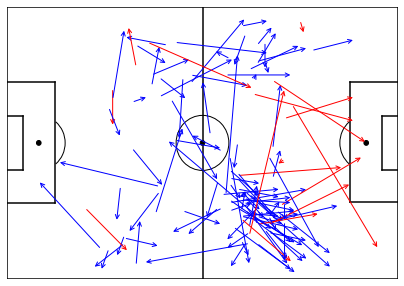

In [187]:
fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax)
plt.axis('off')

passes = get_pass_attributes_list(Jorginho_Events)
for event in passes:
    ax.annotate("", xy = ((event['x2'] / 100) * 120, (event['y2'] / 100) * 80), xytext = ((event['x1'] / 100)* 120, (event['y1'] / 100) * 80), arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = event['color']),)
plt.ylim(0, 80)
plt.xlim(0, 120)
plt.show()

Pjanic

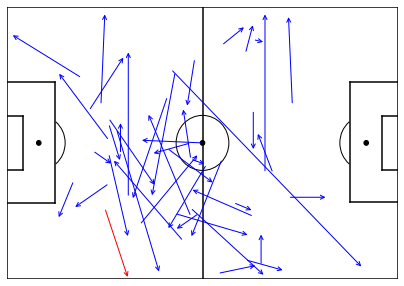

In [188]:
fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax)
plt.axis('off')

passes = get_pass_attributes_list(Pjanic_Events)
for event in passes:
    ax.annotate("", xy = ((event['x2'] / 100) * 120, (event['y2'] / 100) * 80), xytext = ((event['x1'] / 100)* 120, (event['y1'] / 100) * 80), arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = event['color']),)
plt.ylim(0, 80)
plt.xlim(0, 120)
plt.show()

The two maps show clear differences. Jorginho attempted a lor more passes and we can also see he tends to fail passes close to the end of the pitch. Just like Messi and Ronaldo Jorginho seems to show a favourite side of the map.

Pjanic seems to attempt a lot less aggressive passes and tends to be safer, which also explains nearly all of his passes are accurate.